<a href="https://colab.research.google.com/github/Utkarshmishra2k2/House-Snapshot/blob/main/House_Snapshot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/UM1412/Data-Set/main/Melbourne%20Housing%20Data.csv')

In [3]:
df.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
1  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
2  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
3  4/03/2017       2.5    3067.0       3.0       2.0  1.0      94.0   
4  4/06/2016       2.5    3067.0       3.0       1.0  2.0     120.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN       Yarra   -37.7996    144.9984   
1          79.0     1900.0       Yarra   -37.8079    144.9934   
2         150.0     1900.0       Yarra   -37.8093    144.9944   
3           NaN        NaN       Yarra   -37.7969    144.9969   
4         142.0     2014.0       Yarra   -37.8072    144.9941   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

# Data Preprocessing

In [4]:
df.select_dtypes(include='object').nunique()

Suburb           314
Address        13378
Type               3
Method             5
SellerG          268
Date              58
CouncilArea       33
Regionname         8
dtype: int64

In [5]:
df.drop(columns=['Suburb','Address','SellerG'], inplace=True)

In [6]:
df['Date'] = df['Date'].str[-4:]

In [7]:
df['Date'] = df['Date'].astype(int)

In [8]:
df.sample(10)

Rooms Type      Price Method  Date  Distance  Postcode  Bedroom2  \
2427       2    u   480000.0     VB  2017       8.0    3040.0       2.0   
9237       4    h   720000.0      S  2017      17.9    3082.0       4.0   
872        4    t  1250000.0     PI  2016      13.9    3165.0       4.0   
5970       2    h   551000.0      S  2017      12.6    3020.0       2.0   
2229       2    h   900000.0     VB  2016       8.5    3185.0       2.0   
12315      2    h  1910000.0      S  2017       7.3    3146.0       2.0   
9575       4    h  7650000.0      S  2017       5.3    3122.0       4.0   
458        3    u   665000.0      S  2016      10.5    3034.0       3.0   
2460       2    u   630000.0      S  2016       8.0    3040.0       2.0   
7339       2    h   750000.0     PI  2016      14.0    3166.0       2.0   

       Bathroom  Car  Landsize  BuildingArea  YearBuilt    CouncilArea  \
2427        1.0  1.0       0.0           NaN     2011.0  Moonee Valley   
9237        2.0  3.0     649.0         158.0     1985.0     Whittlesea   
872         2.0  2.0     314.0         231.0     2010.0      Glen Eira   
5970        1.0  2.0     613.0           NaN        NaN       Brimbank   
2229        1.0  1.0     198.0           NaN        NaN      Glen Eira   
12315       1.0  1.0     848.0           NaN        NaN            NaN   
9575        2.0  4.0    1690.0         284.0     1863.0     Boroondara   
458         2.0  1.0     289.0           NaN        NaN  Moonee Valley   
2460        1.0  1.0       0.0          83.0     1975.0  Moonee Valley   
7339        2.0  2.0     607.0         138.0     1950.0         Monash   

       Lattitude  Longtitude             Regionname  Propertycount  
2427   -37.74440   144.91160   Western Metropolitan         9264.0  
9237   -37.67681   145.06414  Northern Metropolitan        10529.0  
872    -37.92990   145.05980  Southern Metropolitan        10969.0  
5970   -37.79180   144.82680   Western Metropolitan         3755.0  
2229   -37.88240   145.01330  Southern Metropolitan         4898.0  
12315  -37.85875   145.08441  Southern Metropolitan        10412.0  
9575   -37.82652   145.03052  Southern Metropolitan        11308.0  
458    -37.76440   144.86570   Western Metropolitan         4502.0  
2460   -37.75430   144.90660   Western Metropolitan         9264.0  
7339   -37.89640   145.09770  Southern Metropolitan         3224.0

Segment Council Area into smaller unique value number

In [9]:
df['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [10]:
def segment_council_area(area):
    if area in ['Yarra', 'Port Phillip', 'Stonnington', 'Boroondara']:
        return 'Inner Melbourne'
    elif area in ['Moonee Valley', 'Darebin', 'Hobsons Bay', 'Maribyrnong', 'Bayside', 'Moreland', 'Melbourne']:
        return 'Middle Melbourne'
    elif area in ['Monash', 'Glen Eira', 'Whitehorse', 'Banyule', 'Kingston']:
        return 'Outer Melbourne'
    else:
        return 'Other'

df['CouncilArea'] = df['CouncilArea'].apply(segment_council_area)

<Axes: >

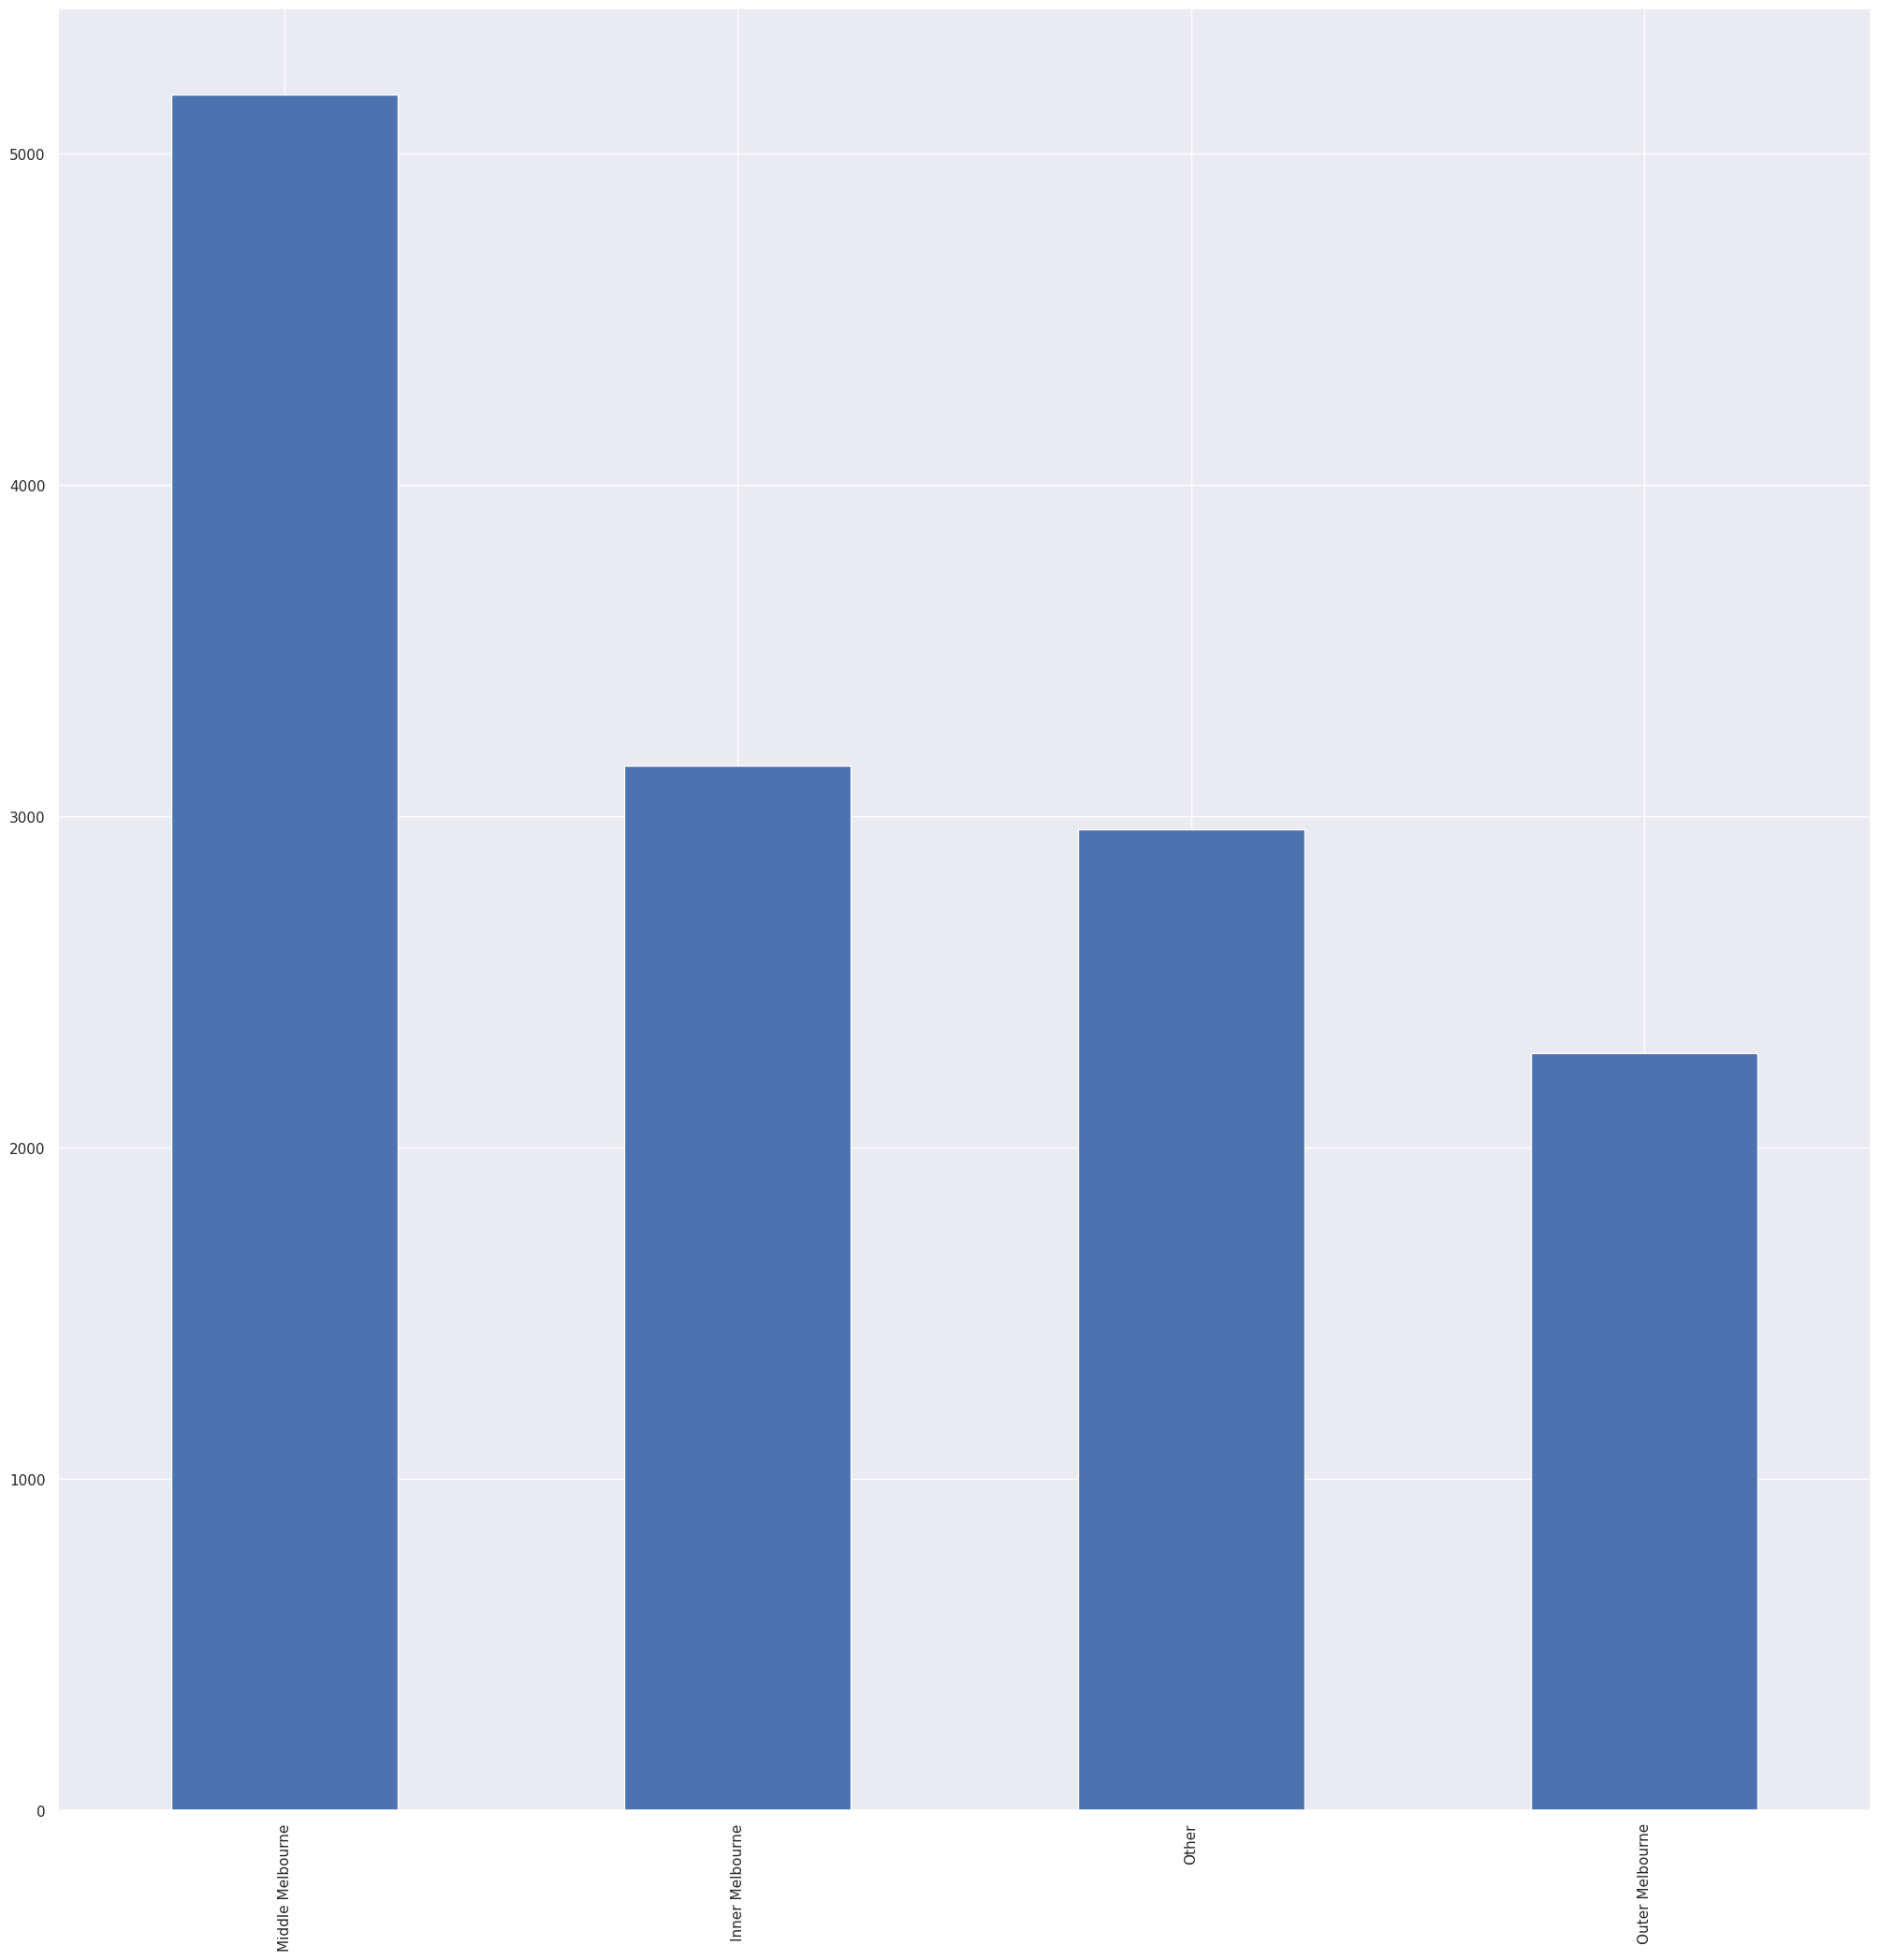

In [11]:
plt.figure(figsize=(25,25))
df['CouncilArea'].value_counts().plot(kind='bar')

In [12]:
df.select_dtypes(include='object').nunique()

Type           3
Method         5
CouncilArea    4
Regionname     8
dtype: int64

In [13]:
df.drop(columns='Postcode', inplace=True)

In [14]:
df.sample(10)

Rooms Type      Price Method  Date  Distance  Bedroom2  Bathroom  Car  \
448        3    h   680000.0      S  2016      10.5       3.0       1.0  2.0   
10998      3    h   830000.0     VB  2017      18.0       3.0       2.0  1.0   
8992       4    h  1000000.0     SP  2017       6.3       4.0       2.0  2.0   
6919       3    h   850000.0     SP  2017      12.4       3.0       1.0  2.0   
8376       2    u   851000.0      S  2017       3.3       2.0       1.0  1.0   
11186      5    h  1170000.0      S  2017       8.9       5.0       3.0  3.0   
8267       3    h  1015000.0      S  2017       8.8       3.0       2.0  1.0   
8638       2    t   811000.0     SP  2017       4.2       2.0       1.0  0.0   
11030      3    h   610000.0      S  2017      38.0       3.0       2.0  1.0   
11741      3    h   725000.0      S  2017      17.9       3.0       2.0  2.0   

       Landsize  BuildingArea  YearBuilt       CouncilArea  Lattitude  \
448       570.0         120.0     1970.0  Middle Melbourne  -37.75910   
10998     817.0           NaN     1970.0             Other  -37.72276   
8992      438.0           NaN        NaN  Middle Melbourne  -37.81789   
6919      604.0           NaN        NaN  Middle Melbourne  -37.70170   
8376      284.0           NaN        NaN   Inner Melbourne  -37.84710   
11186     694.0         210.0     1975.0   Outer Melbourne  -37.73968   
8267      511.0           NaN        NaN  Middle Melbourne  -37.73770   
8638      113.0           NaN        NaN  Middle Melbourne  -37.78980   
11030     654.0           NaN        NaN             Other  -38.16415   
11741     602.0         129.0     1980.0             Other  -37.66916   

       Longtitude                  Regionname  Propertycount  
448     144.85420        Western Metropolitan         4502.0  
10998   145.15316        Eastern Metropolitan         6990.0  
8992    144.86744        Western Metropolitan         6543.0  
6919    144.96760       Northern Metropolitan         5070.0  
8376    145.00190       Southern Metropolitan        14887.0  
11186   145.07973        Eastern Metropolitan         3540.0  
8267    144.99110       Northern Metropolitan        14577.0  
8638    144.92760       Northern Metropolitan         5263.0  
11030   145.14251  South-Eastern Metropolitan        17055.0  
11741   145.06912       Northern Metropolitan        10529.0

# Exploratory Data Analysis

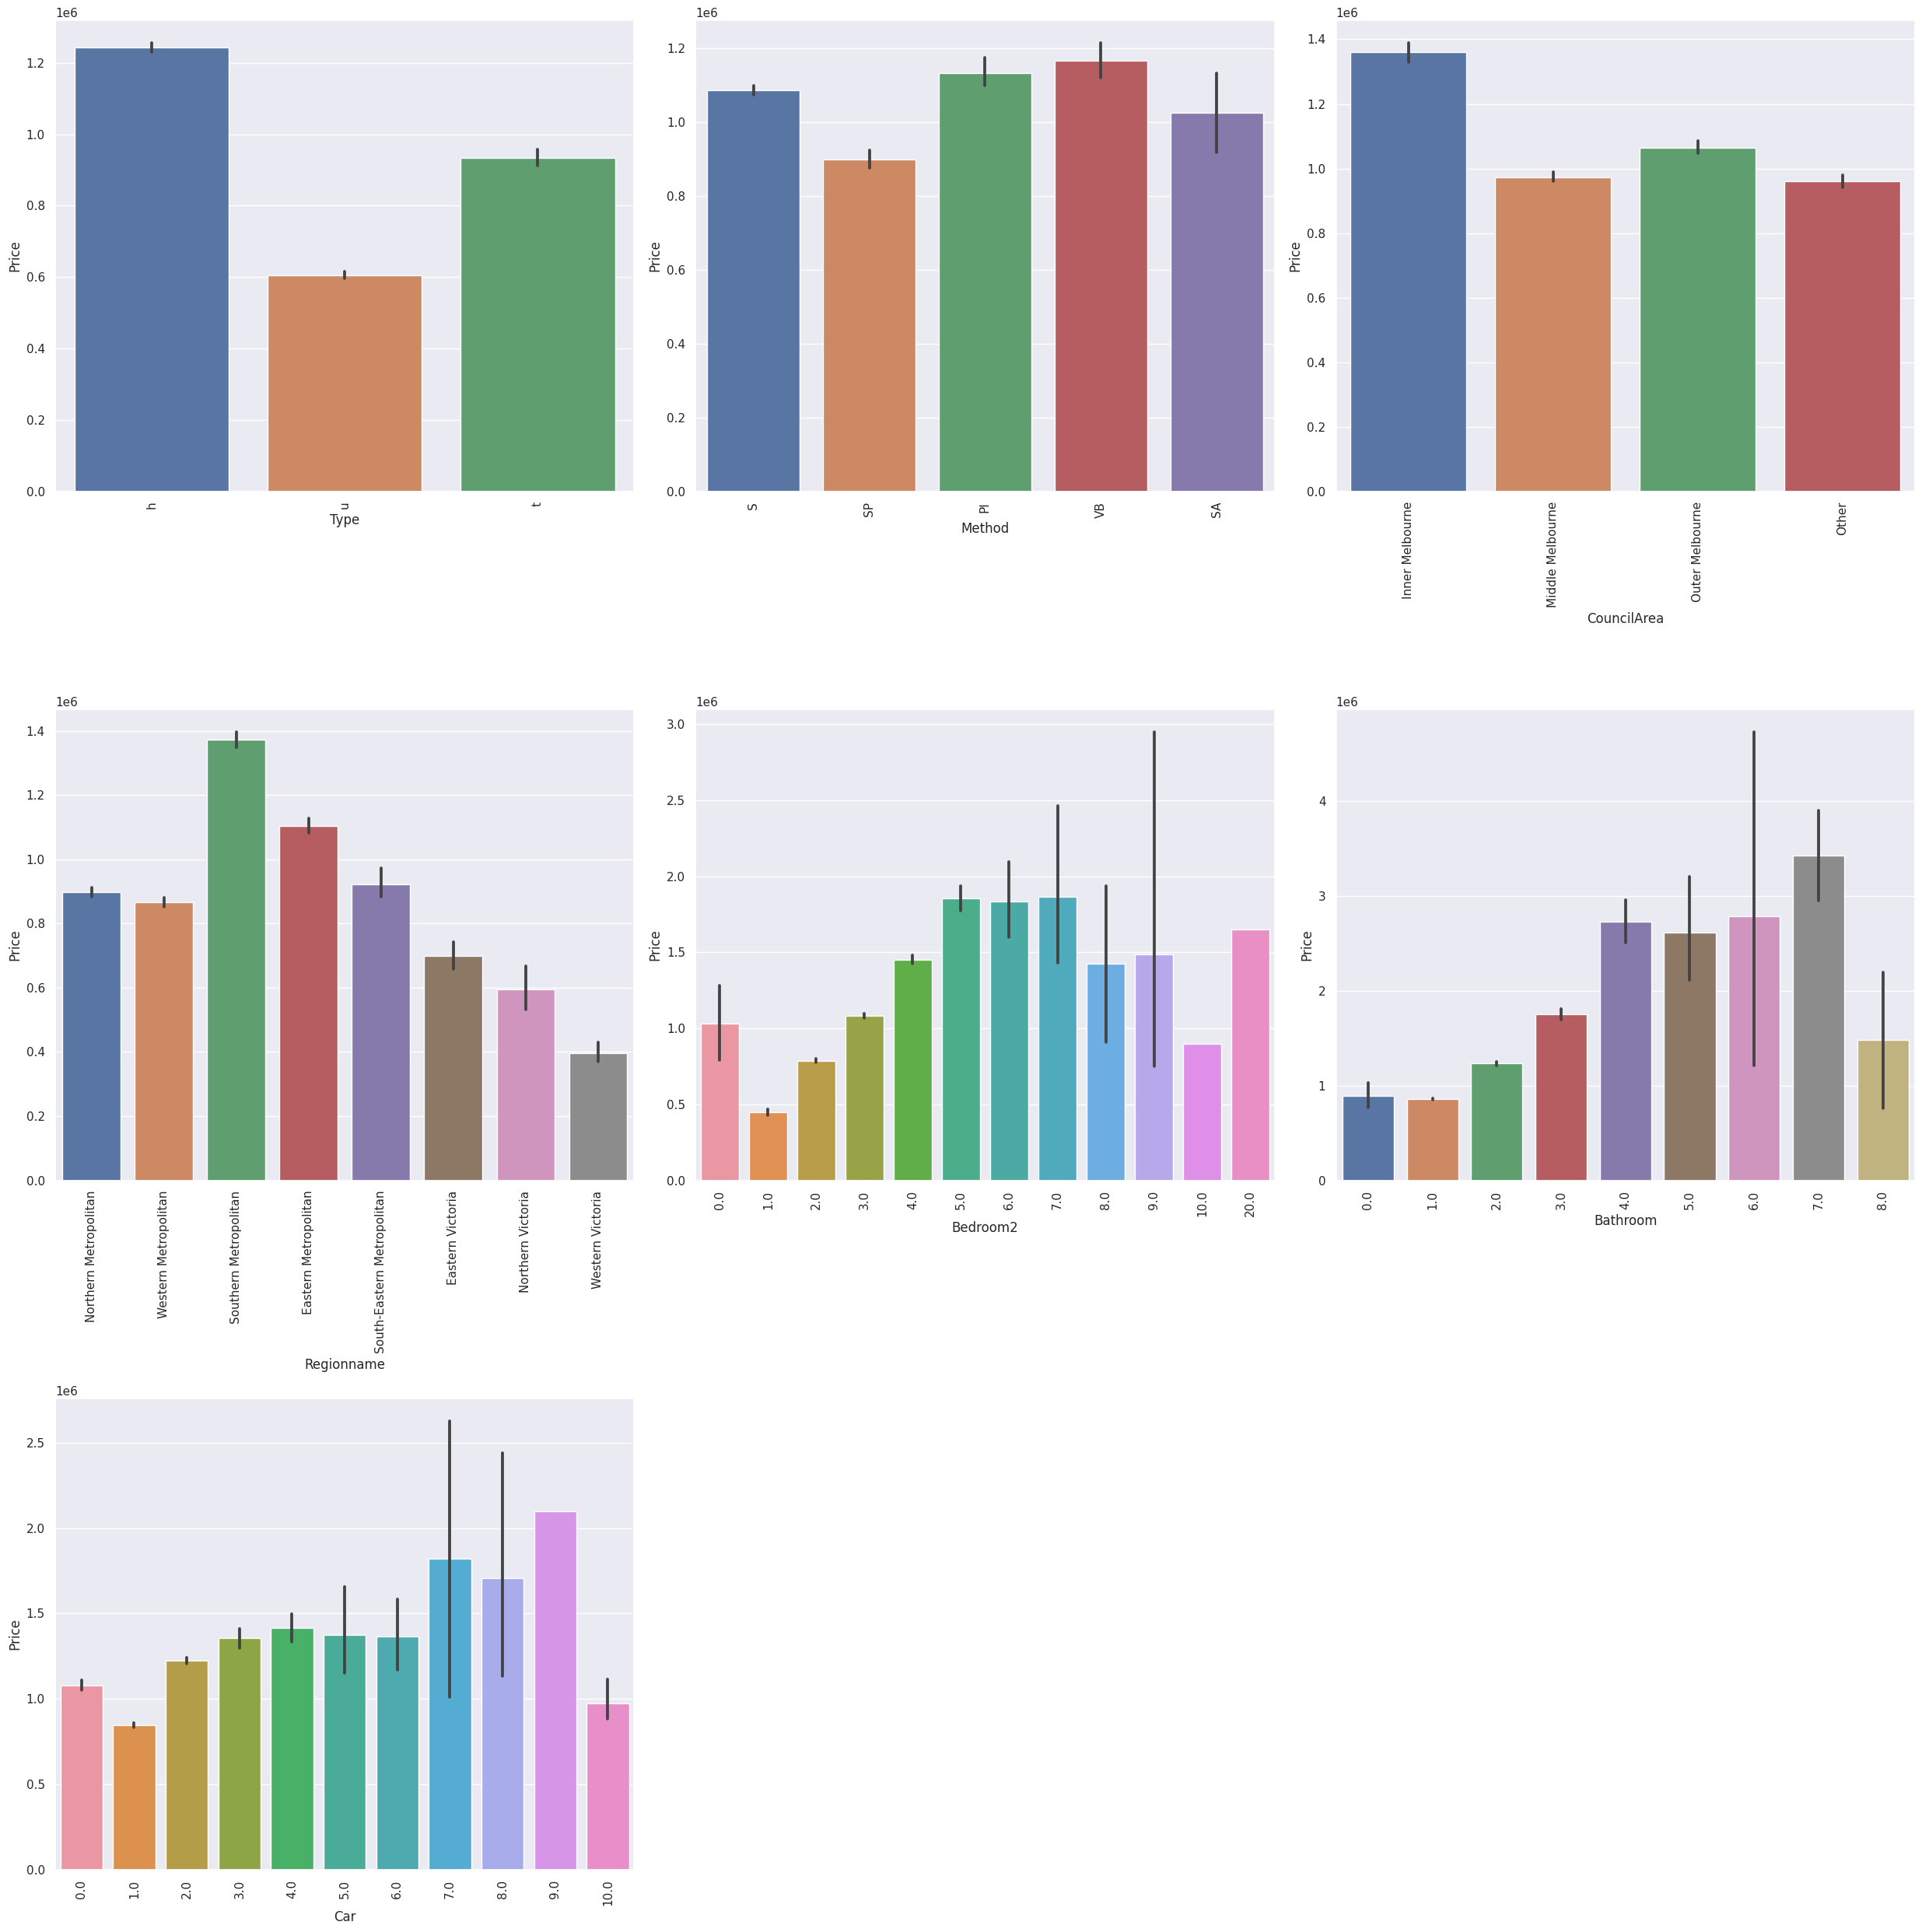

In [15]:
cat_vars = ['Type', 'Method', 'CouncilArea', 'Regionname', 'Bedroom2', 'Bathroom', 'Car']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(25,25))
axs = axs.flatten()
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()
fig.delaxes(axs[7])
fig.delaxes(axs[8])
plt.show()

<ipython-input-16-1388ec230555>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)


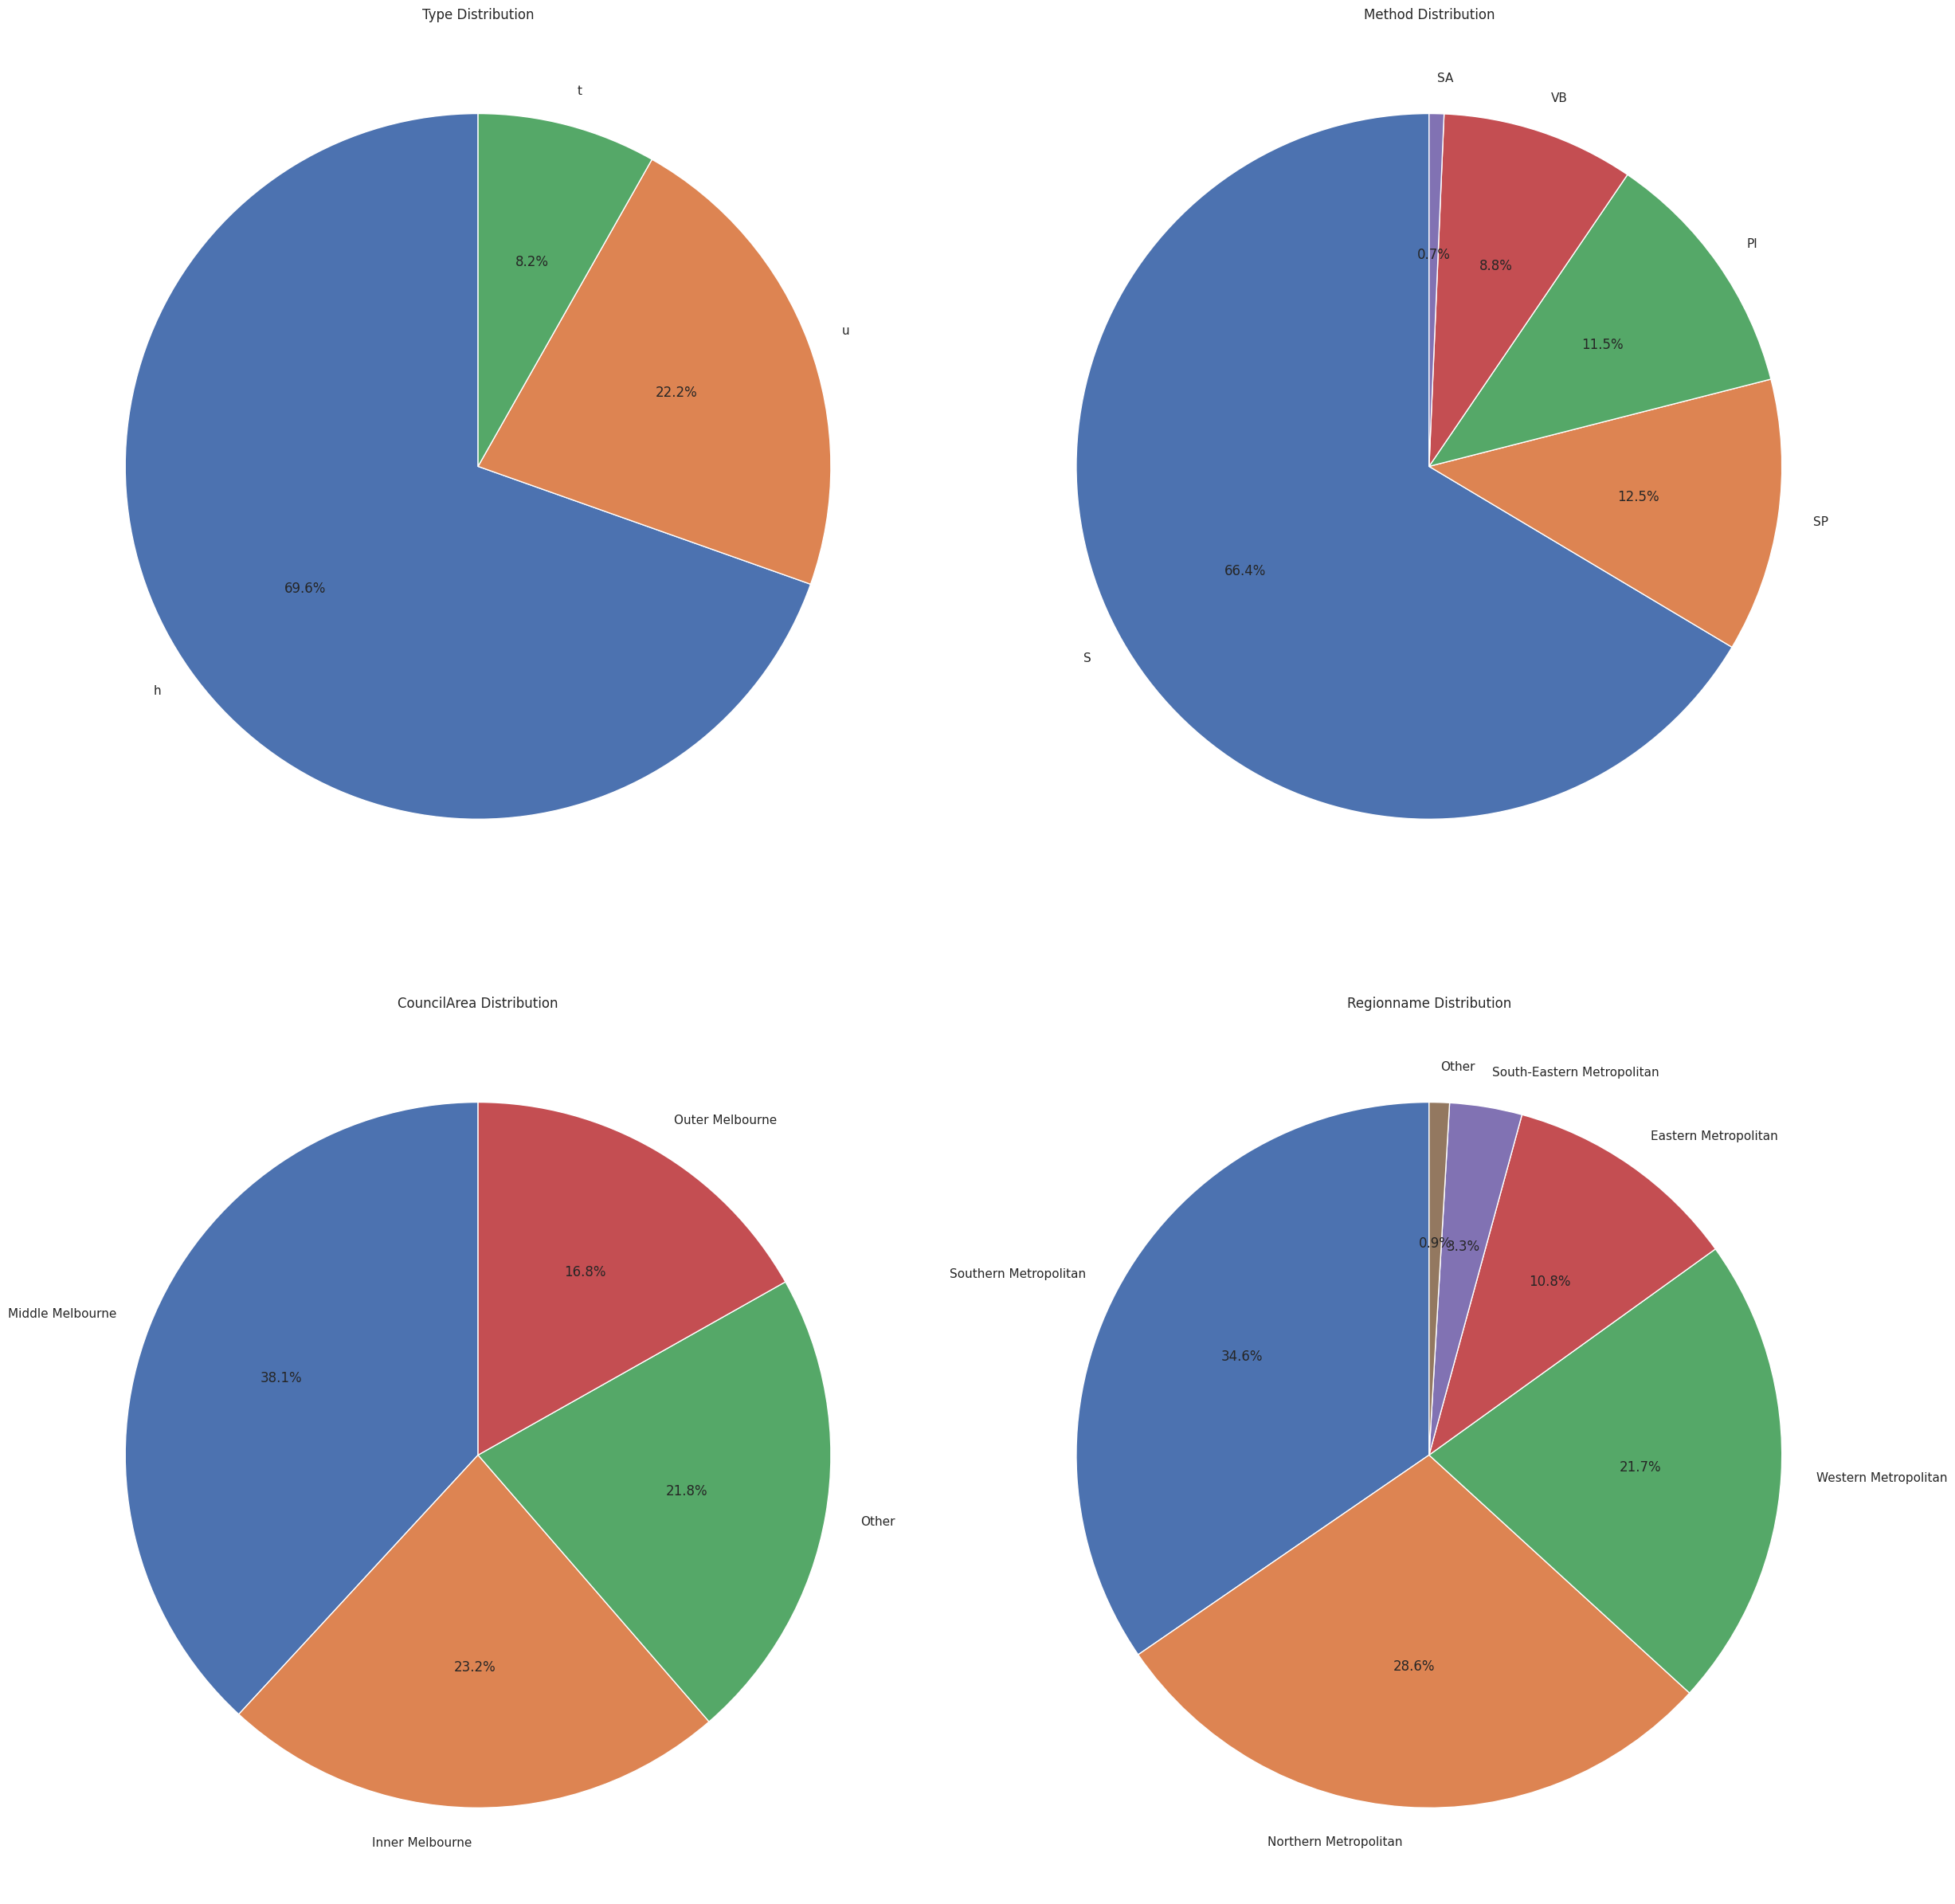

In [16]:
max_categories = 5
cat_vars = ['Type', 'Method', 'CouncilArea', 'Regionname']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,25))
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        cat_counts = df[var].value_counts()
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
fig.tight_layout()
plt.show()

In [17]:
df = df[df['YearBuilt'] >= 1800]

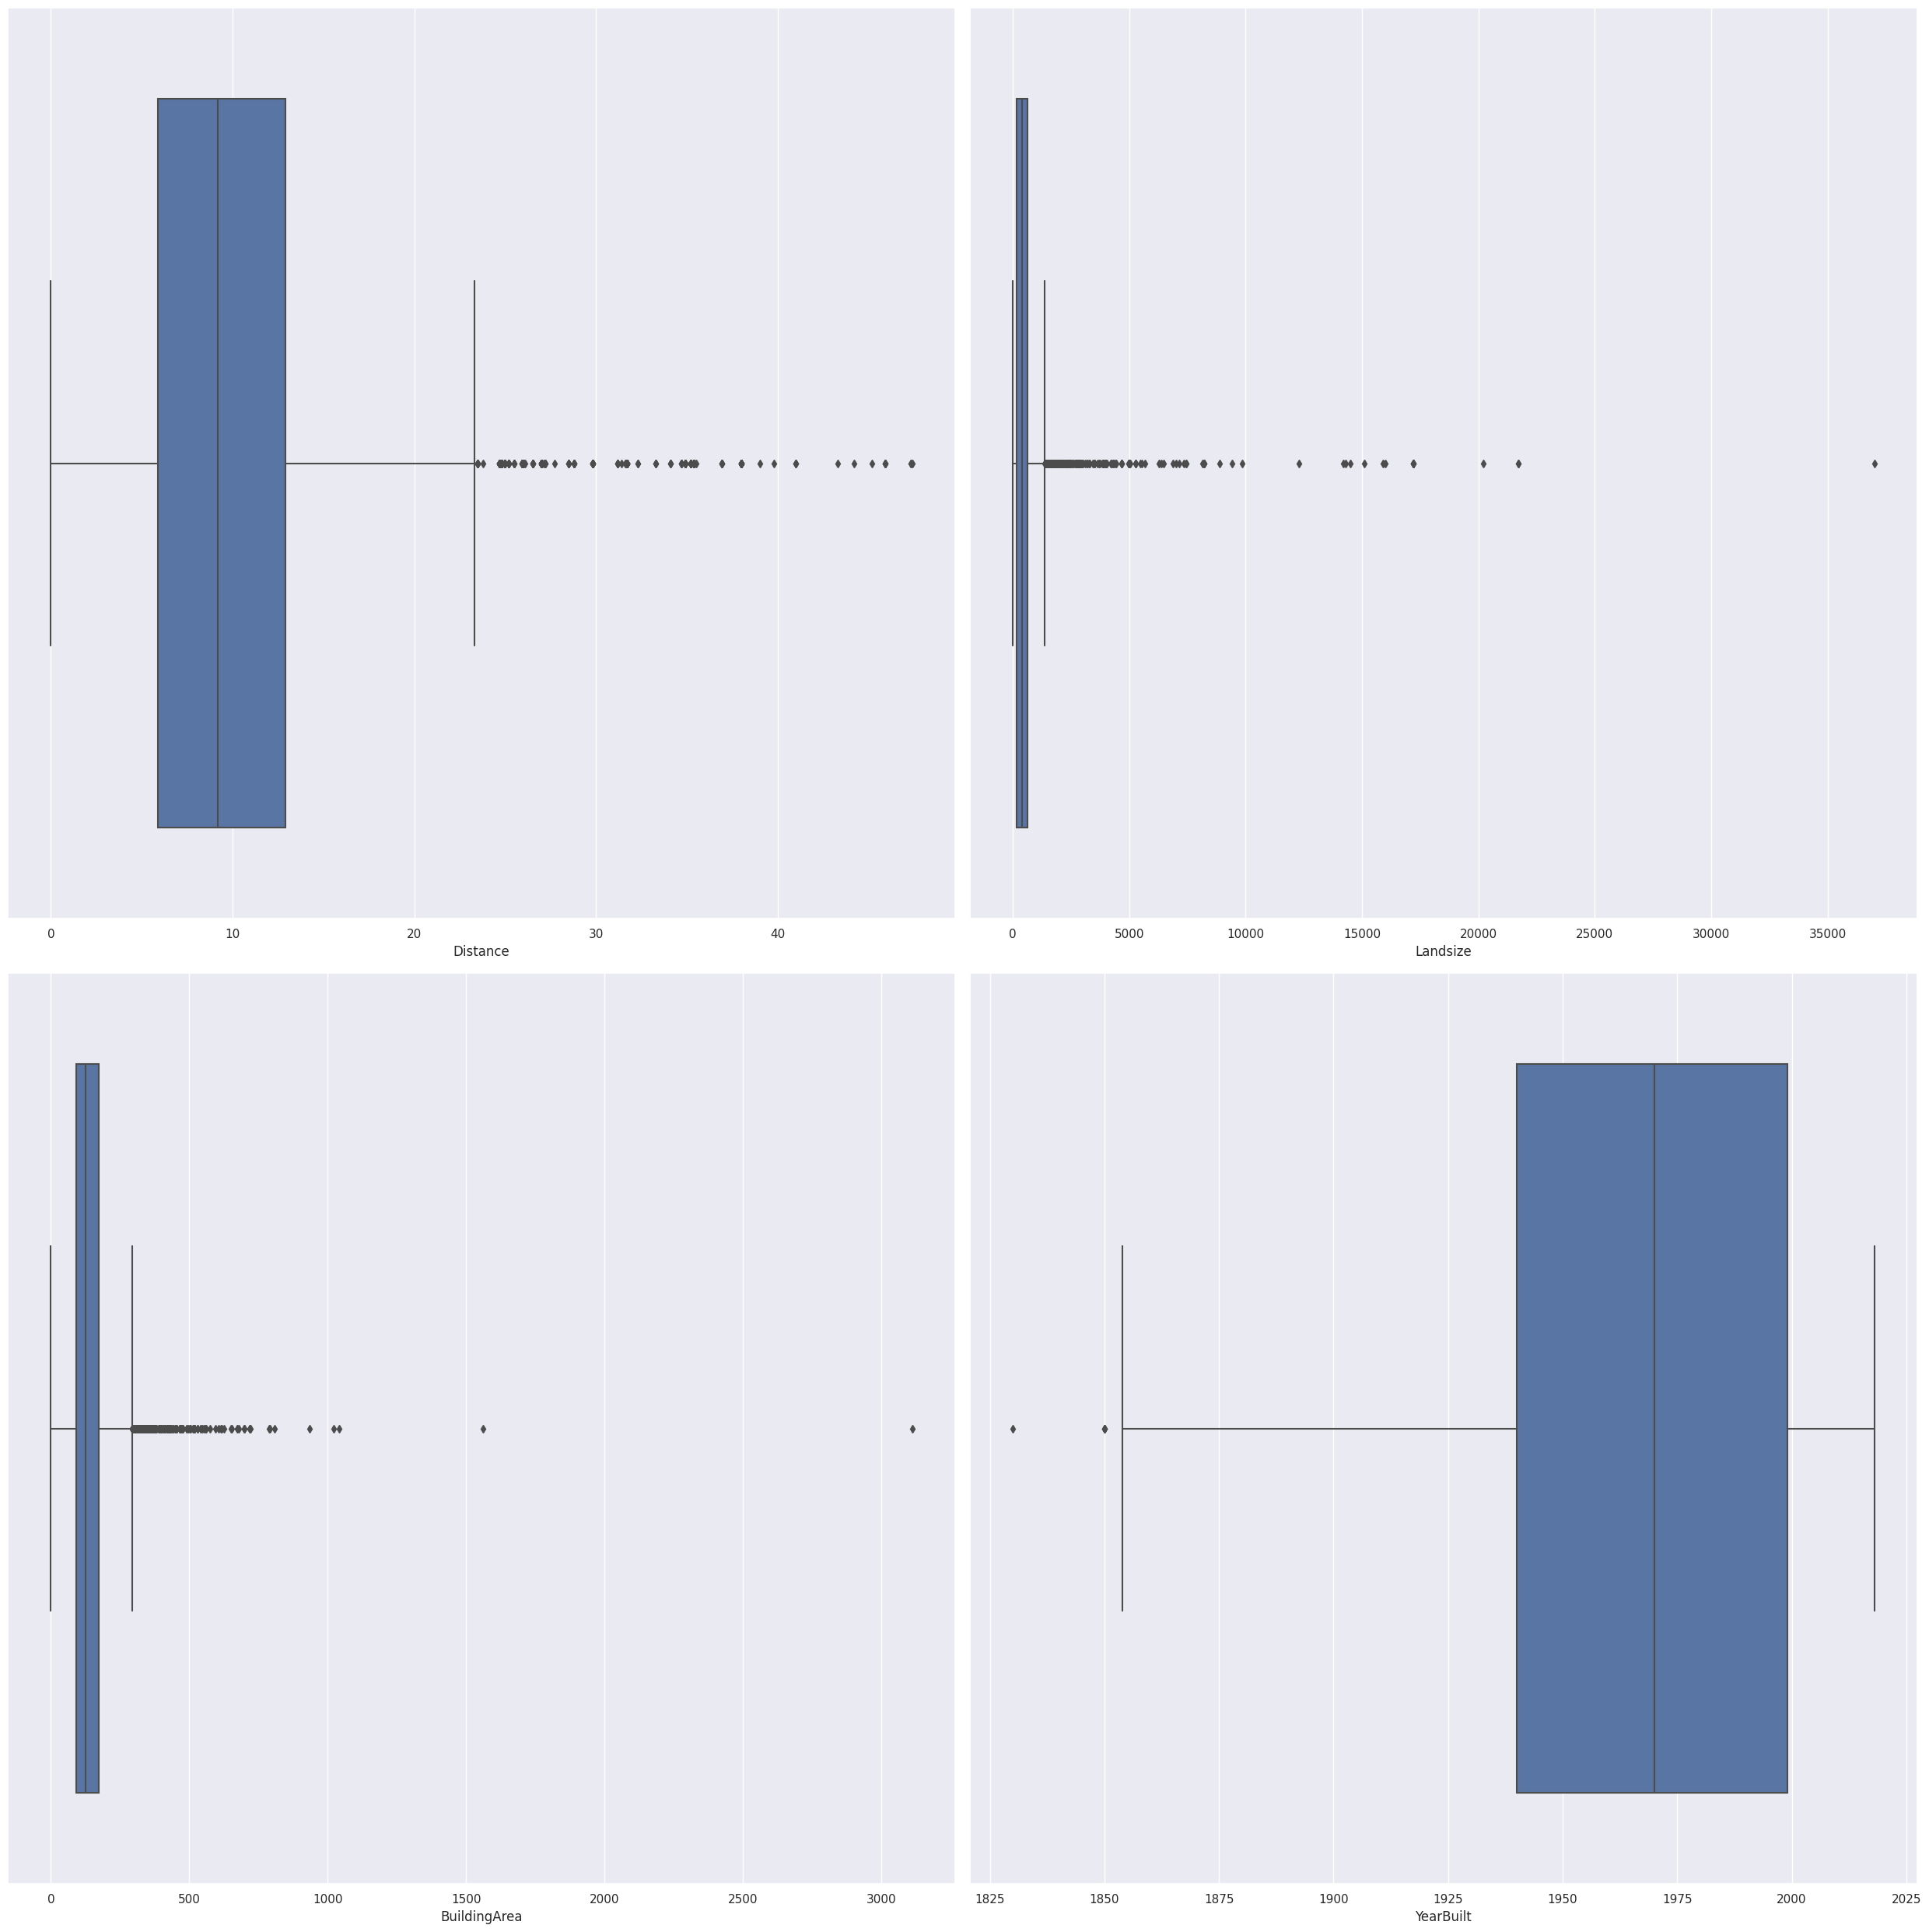

In [18]:
num_vars = ['Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,25))
axs = axs.flatten()
for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])
fig.tight_layout()
plt.show()

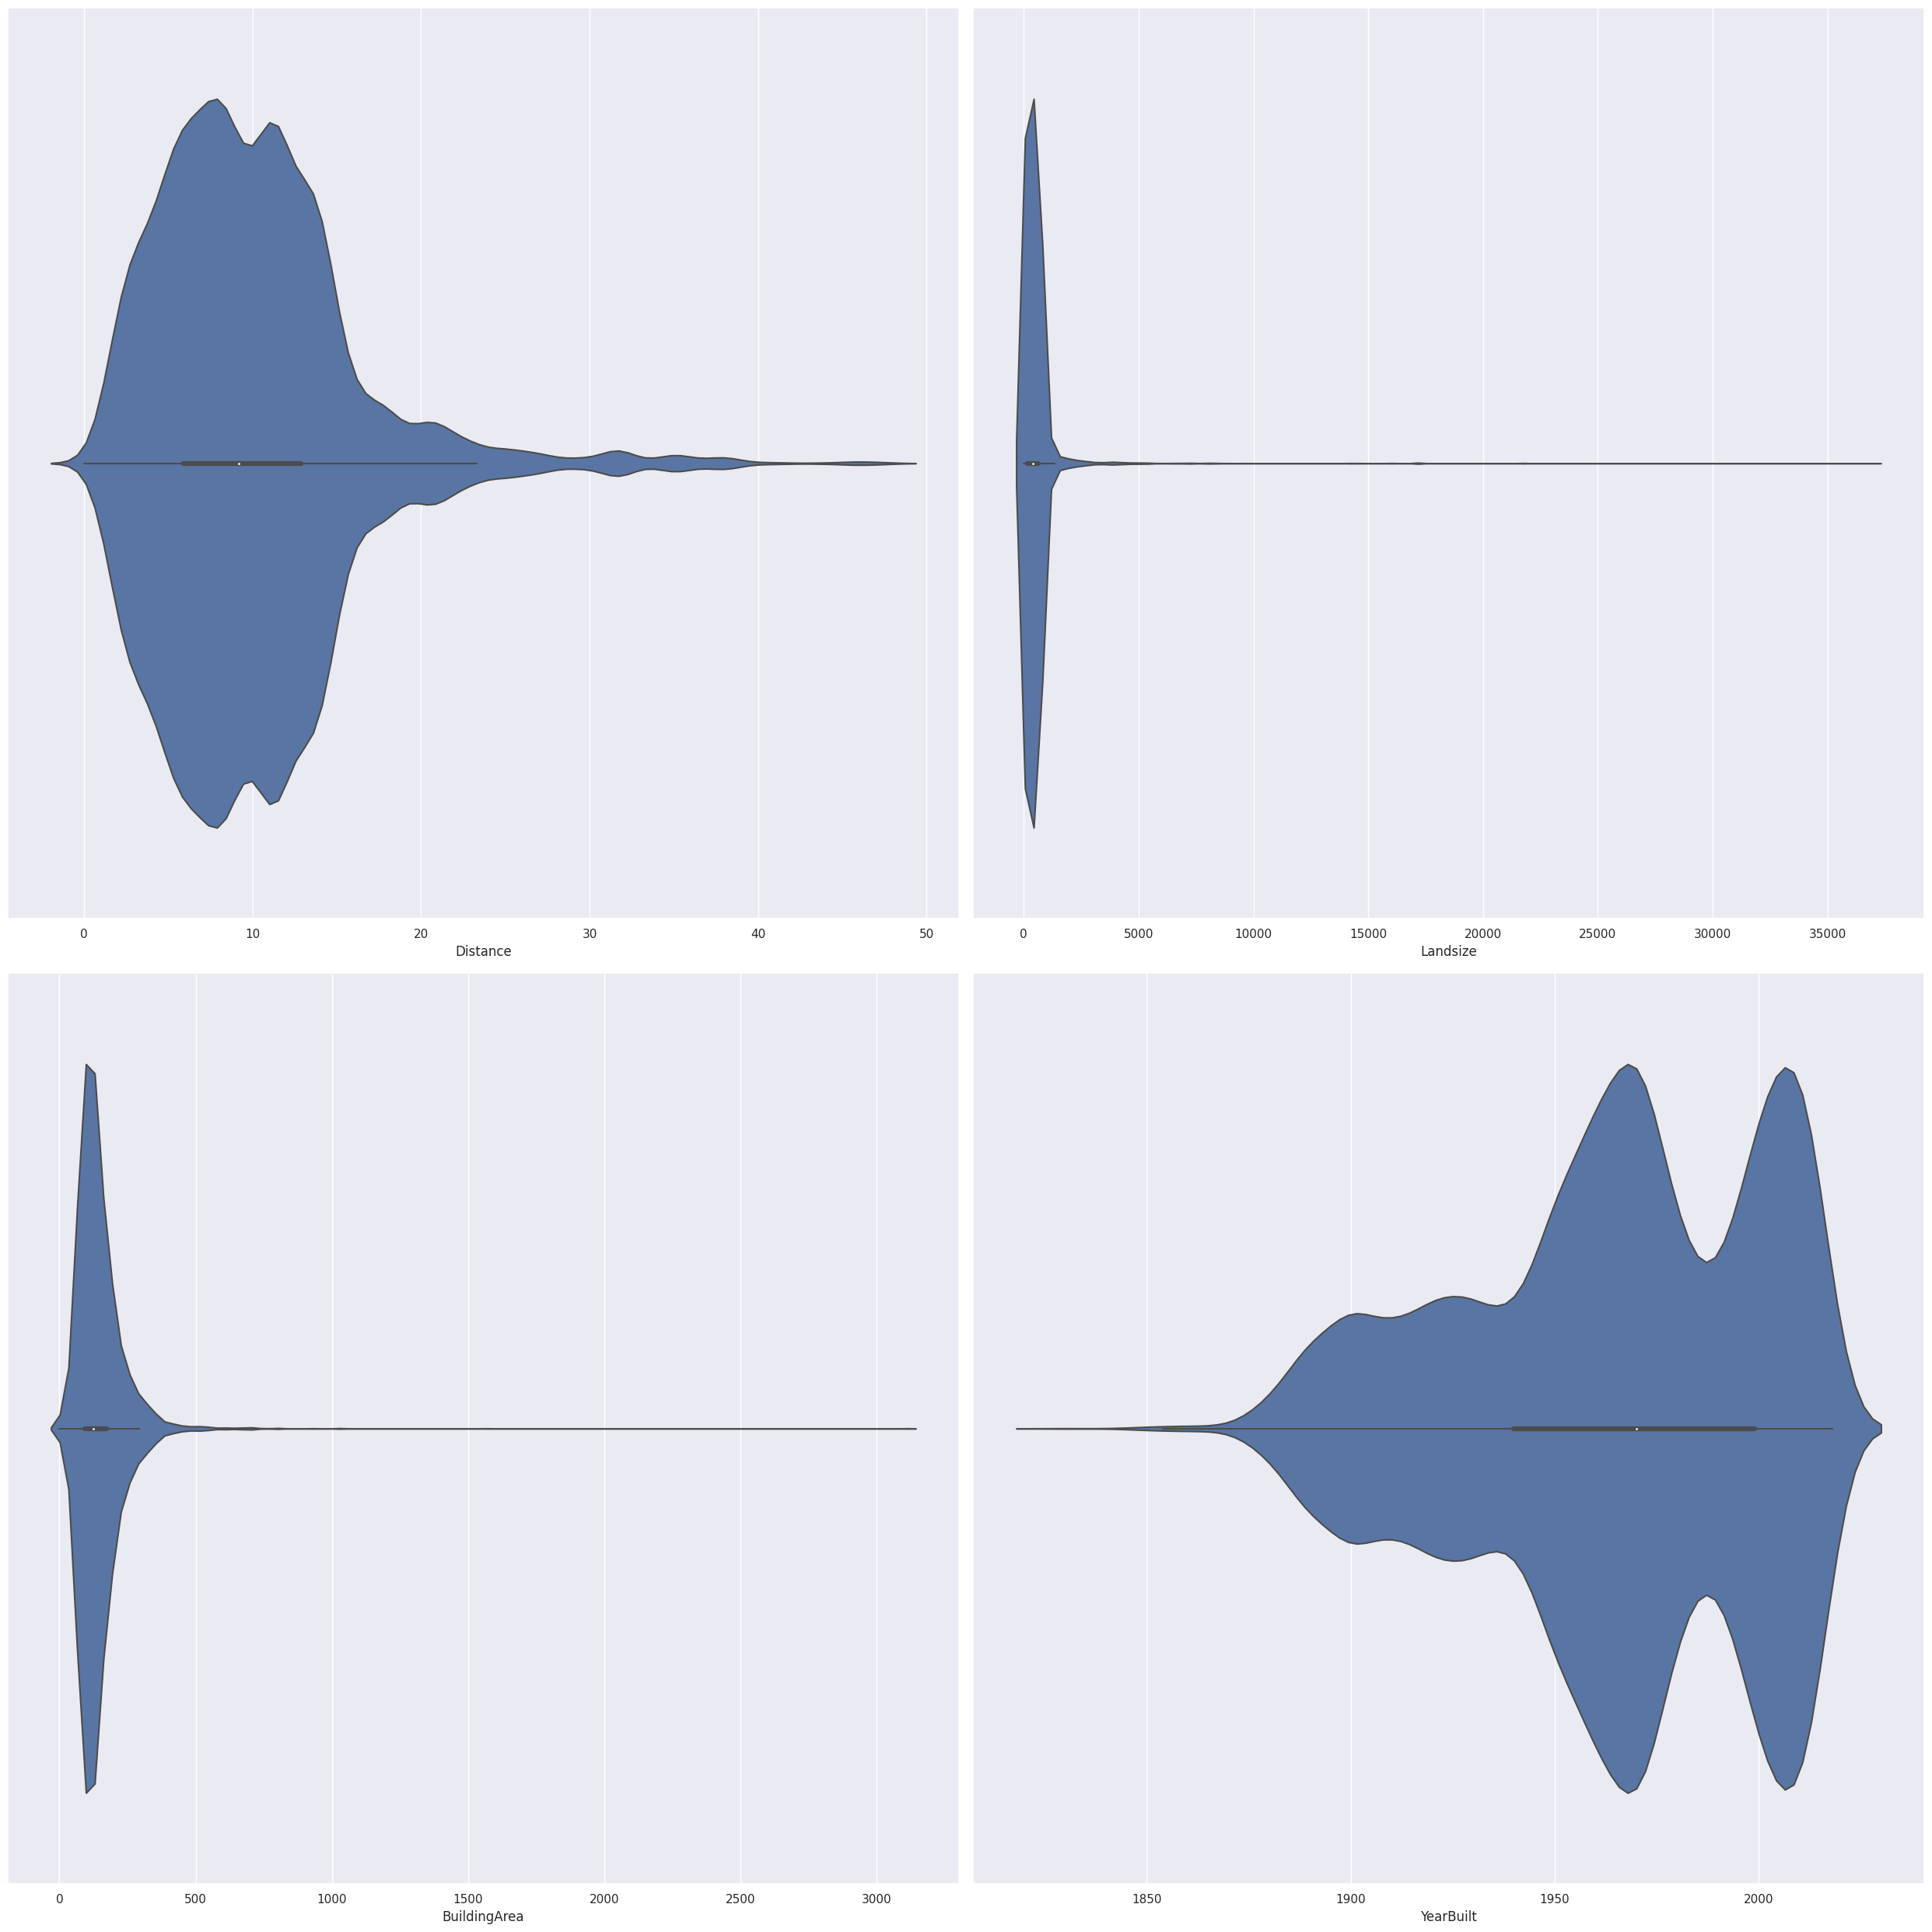

In [19]:
num_vars = ['Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25, 25))
axs = axs.flatten()
for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])
fig.tight_layout()
plt.show()

<ipython-input-20-96840b96d2a0>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='YearBuilt', y='Price', hue='Type', data=df, ci=None, estimator='mean', alpha=0.7)


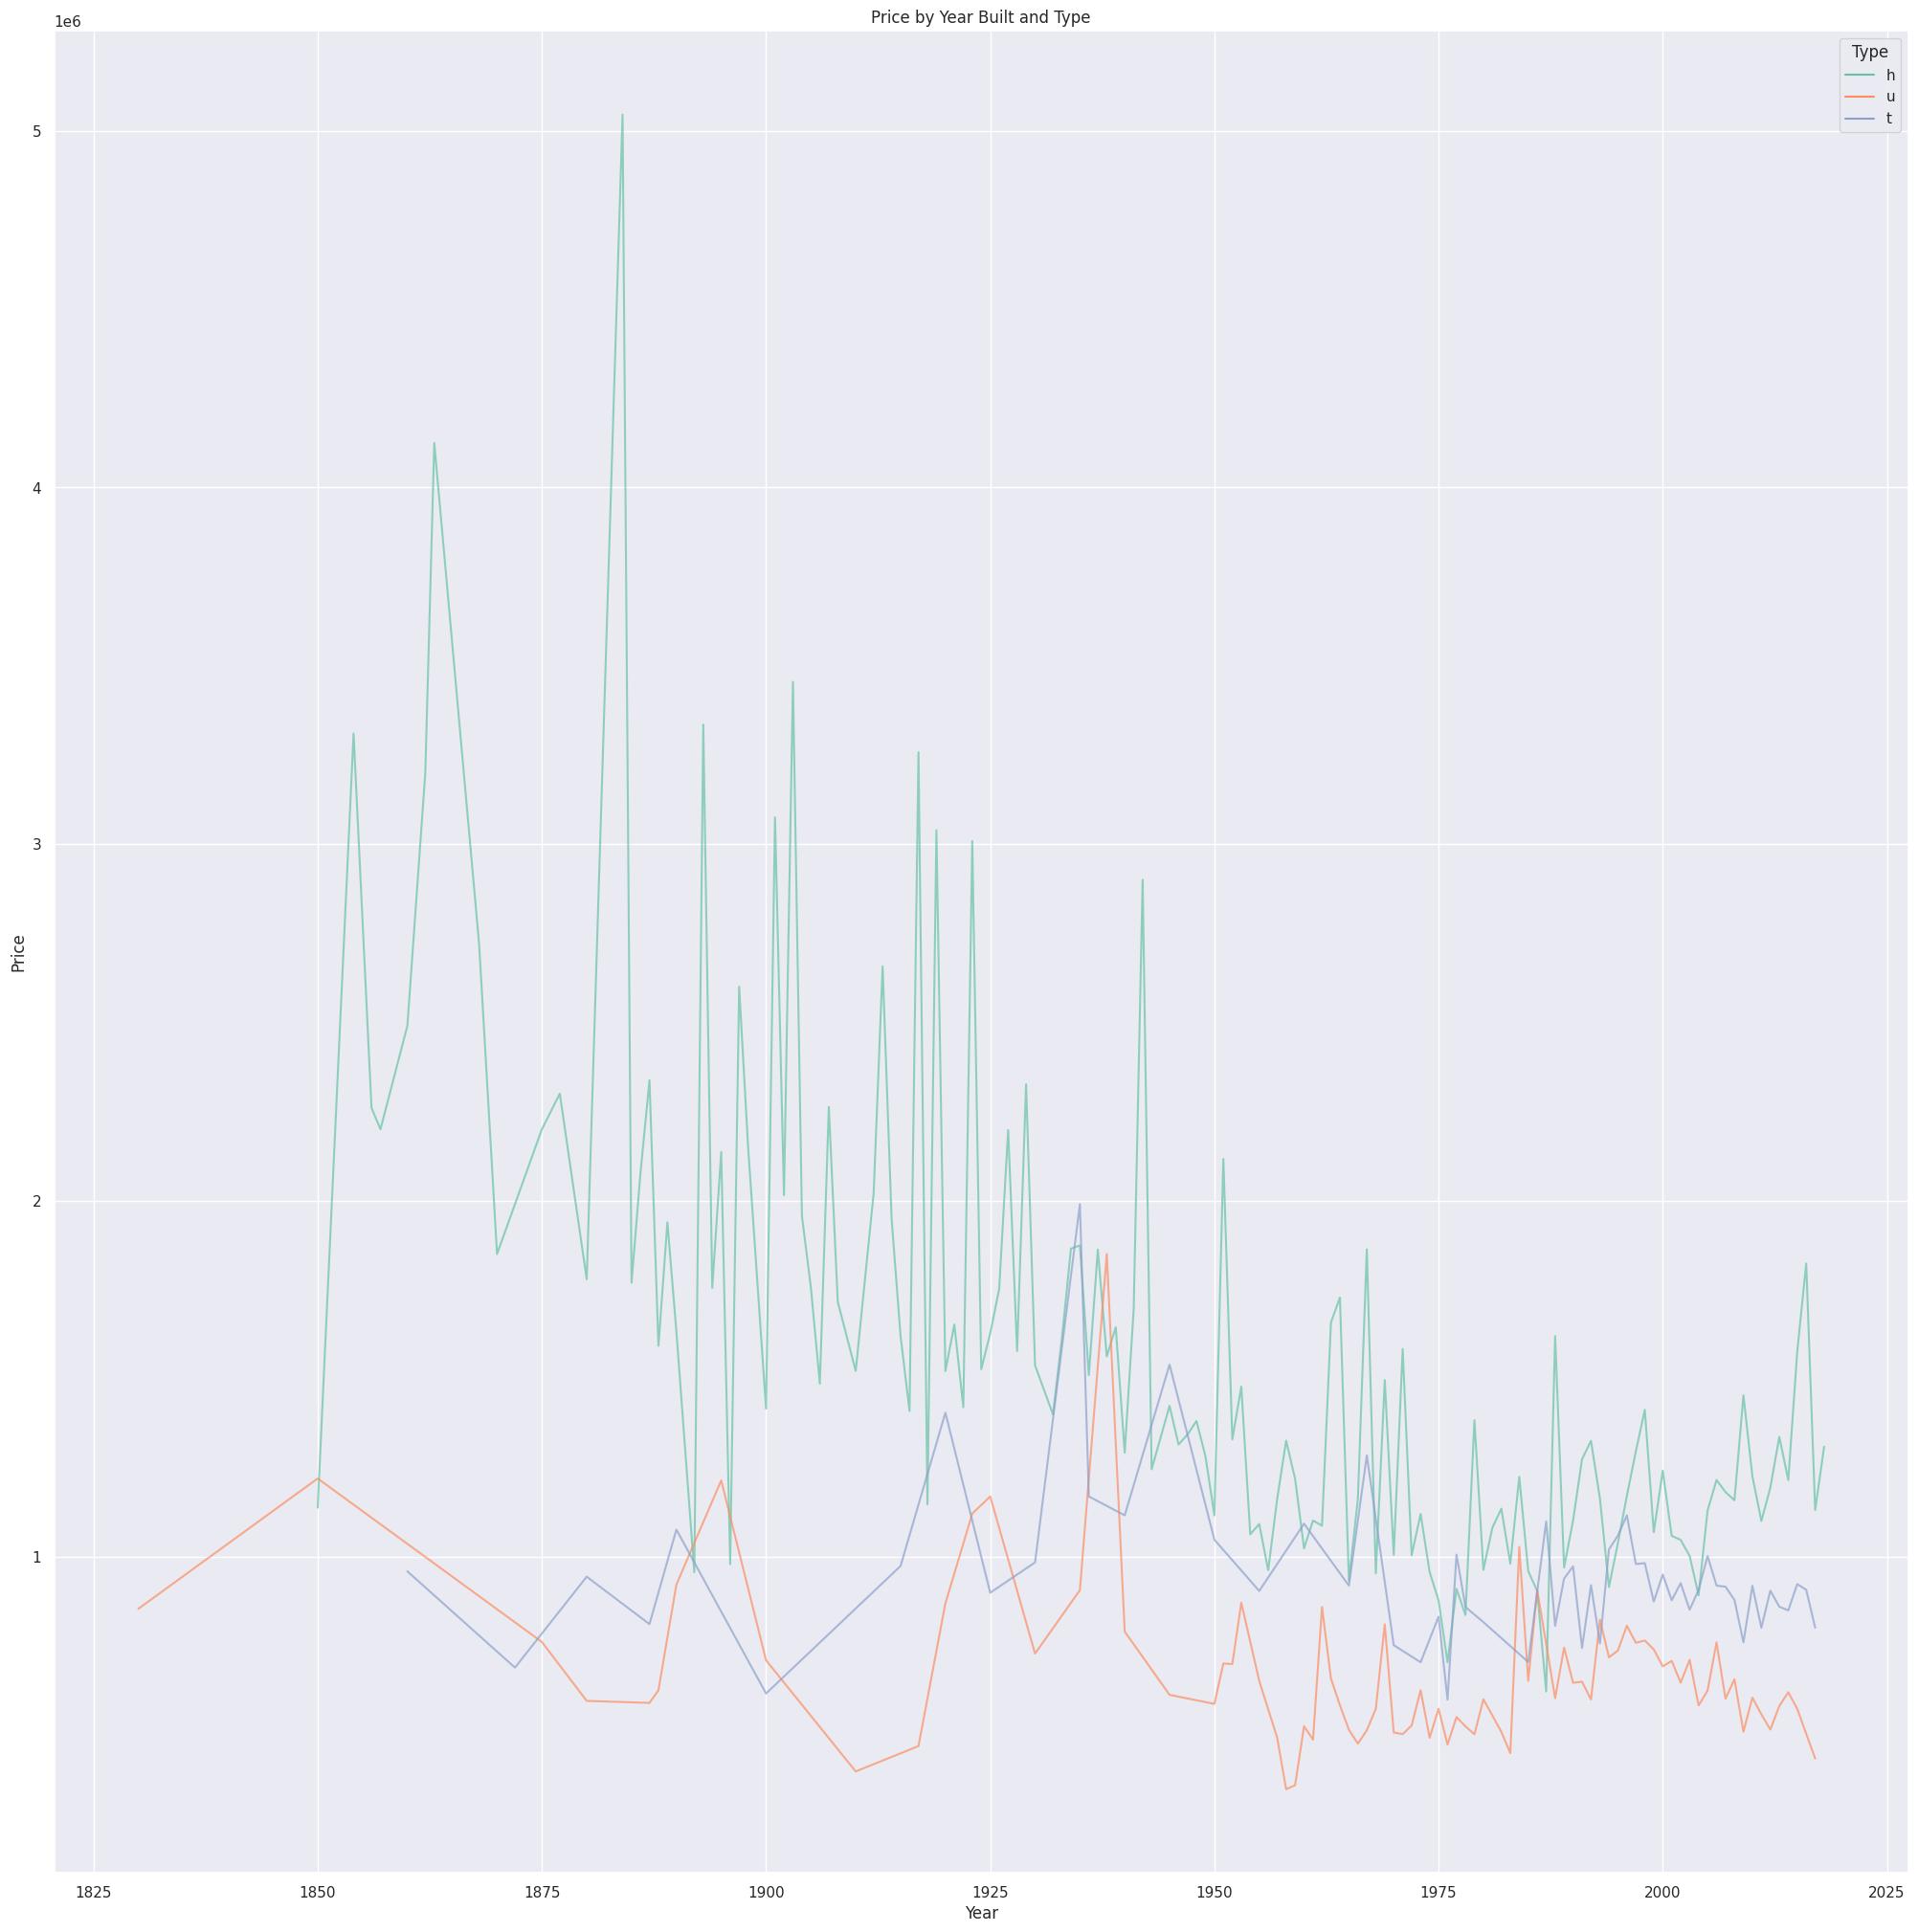

In [20]:
plt.figure(figsize=(25,25))
sns.set_style("darkgrid")
sns.set_palette("Set2")
sns.lineplot(x='YearBuilt', y='Price', hue='Type', data=df, ci=None, estimator='mean', alpha=0.7)
plt.title("Price by Year Built and Type")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

<ipython-input-21-82f6708b3c97>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='YearBuilt', y='Price', hue='Method', data=df, ci=None, estimator='mean', alpha=0.7)


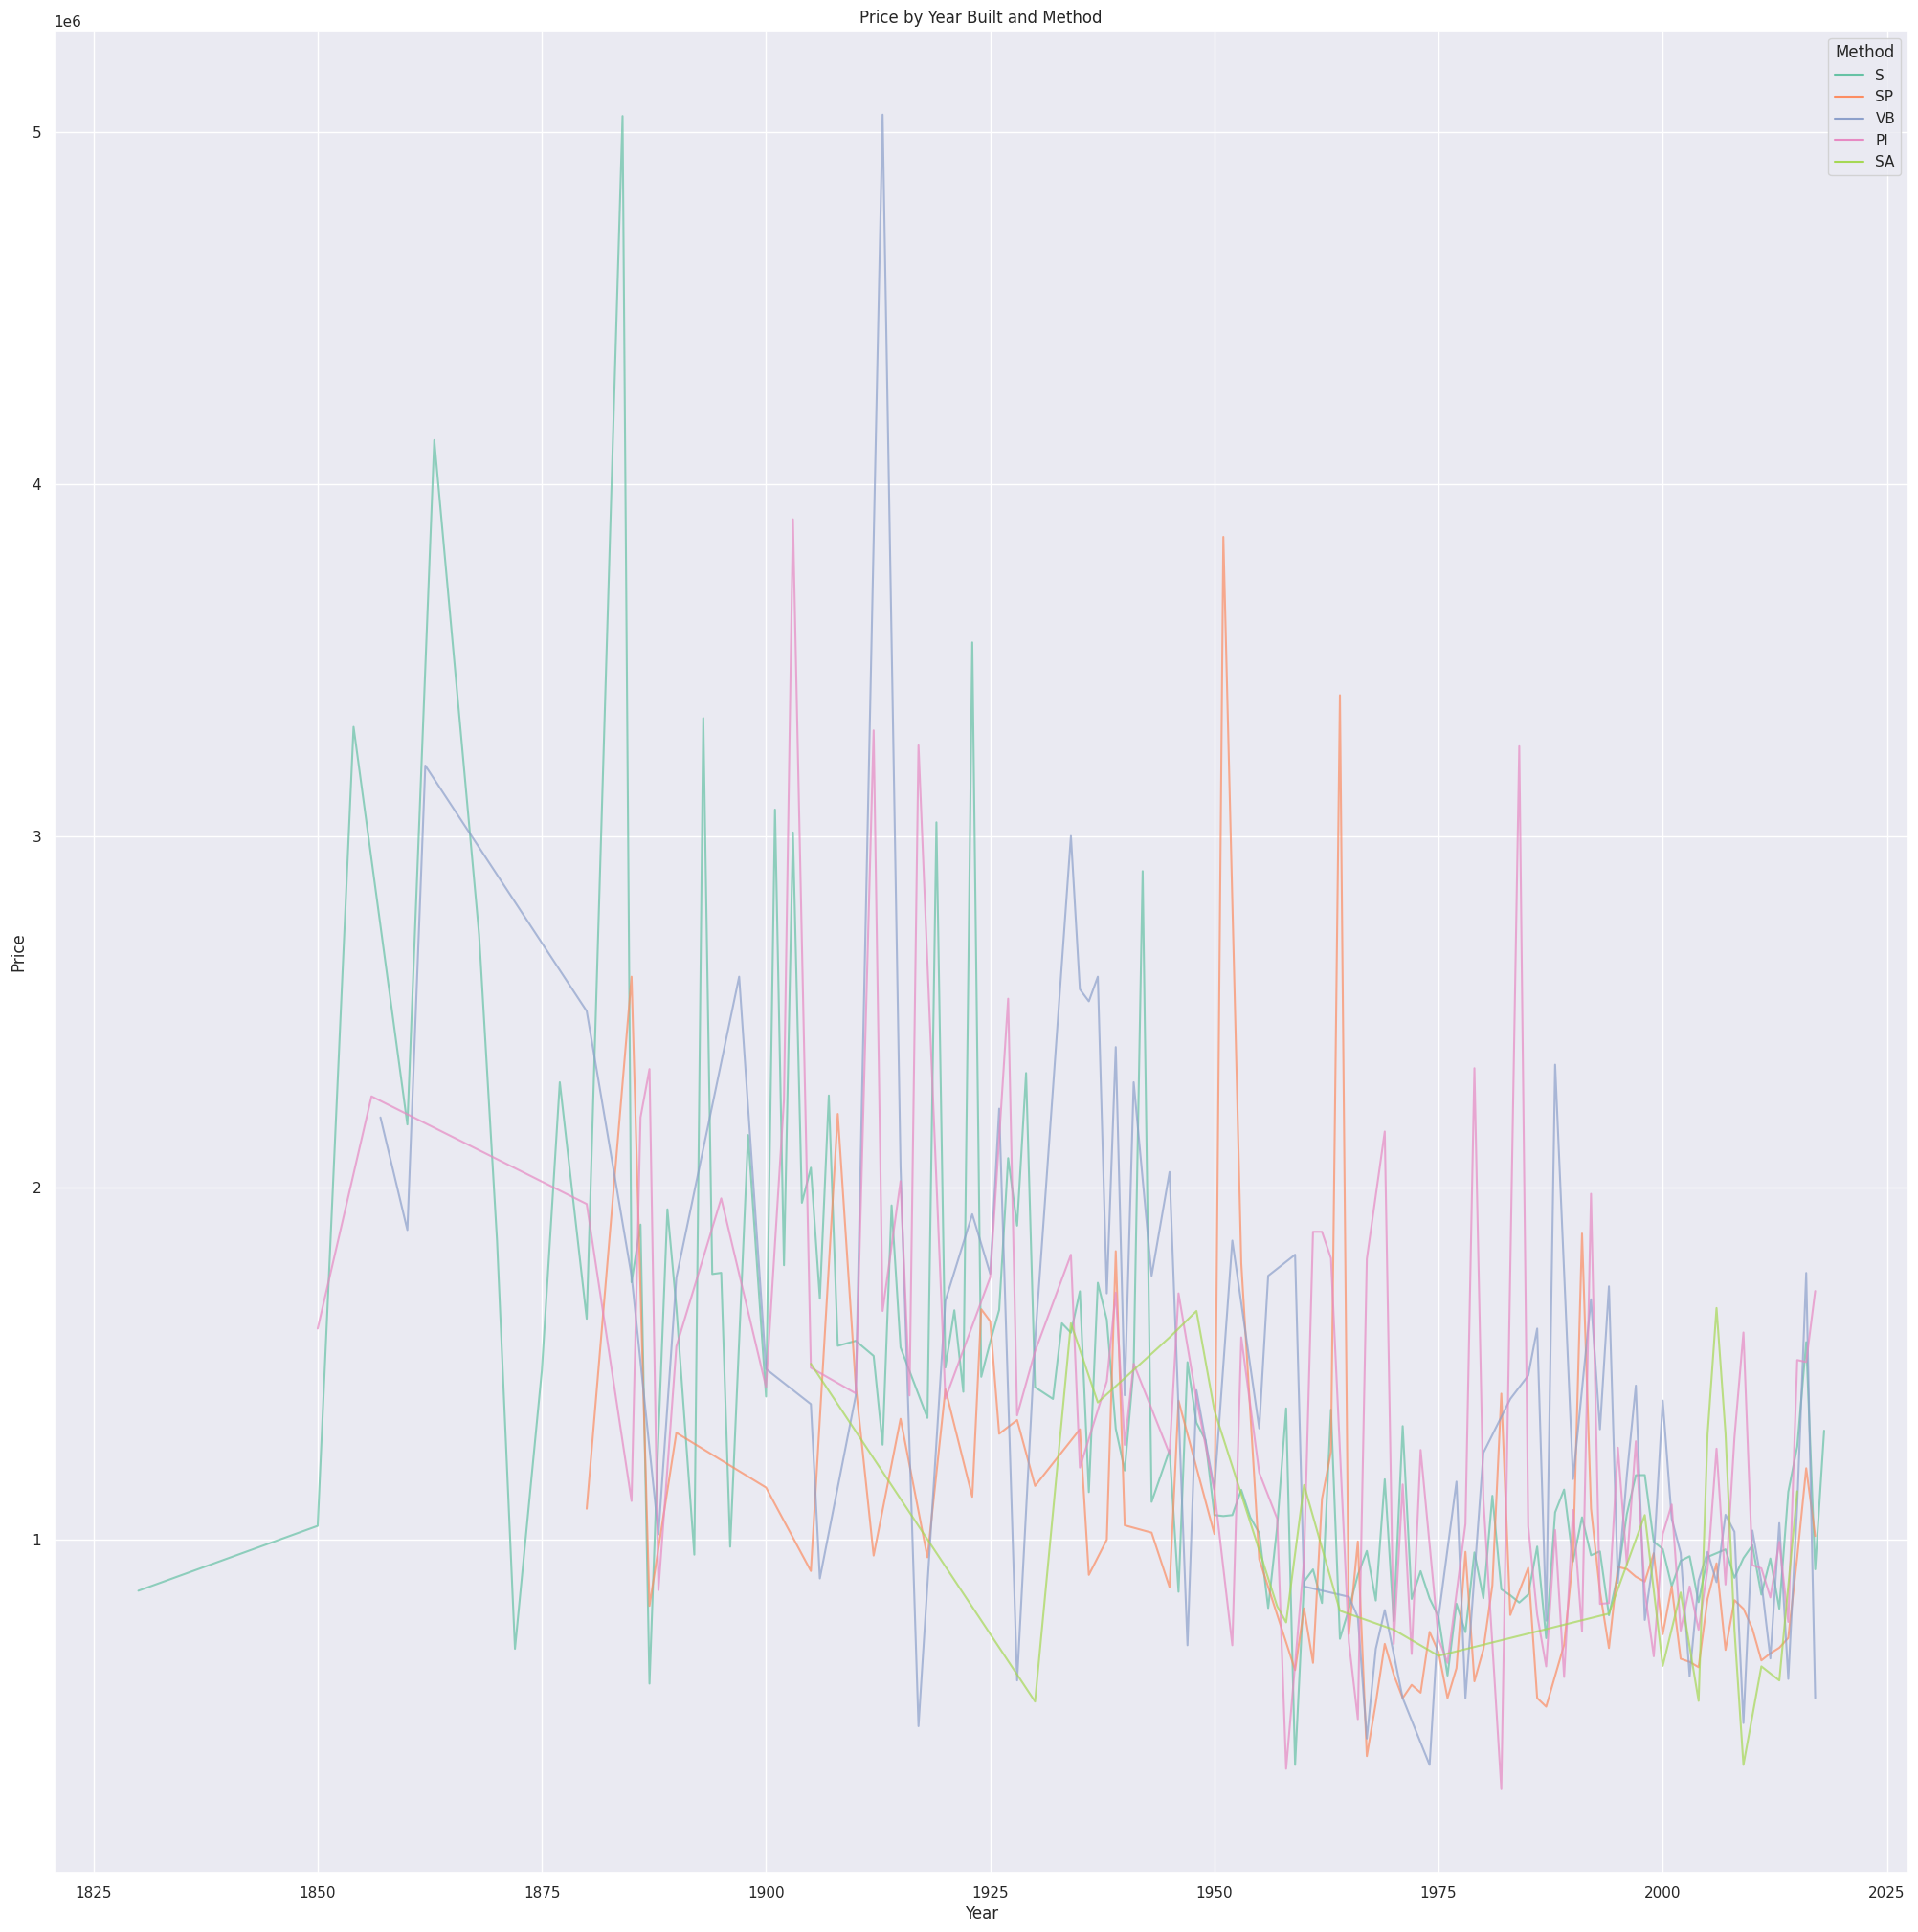

In [21]:
plt.figure(figsize=(25,25))
sns.set_style("darkgrid")
sns.set_palette("Set2")
sns.lineplot(x='YearBuilt', y='Price', hue='Method', data=df, ci=None, estimator='mean', alpha=0.7)
plt.title("Price by Year Built and Method")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

<ipython-input-22-c05d350e52cf>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='YearBuilt', y='Price', hue='CouncilArea', data=df, ci=None, estimator='mean', alpha=0.7)


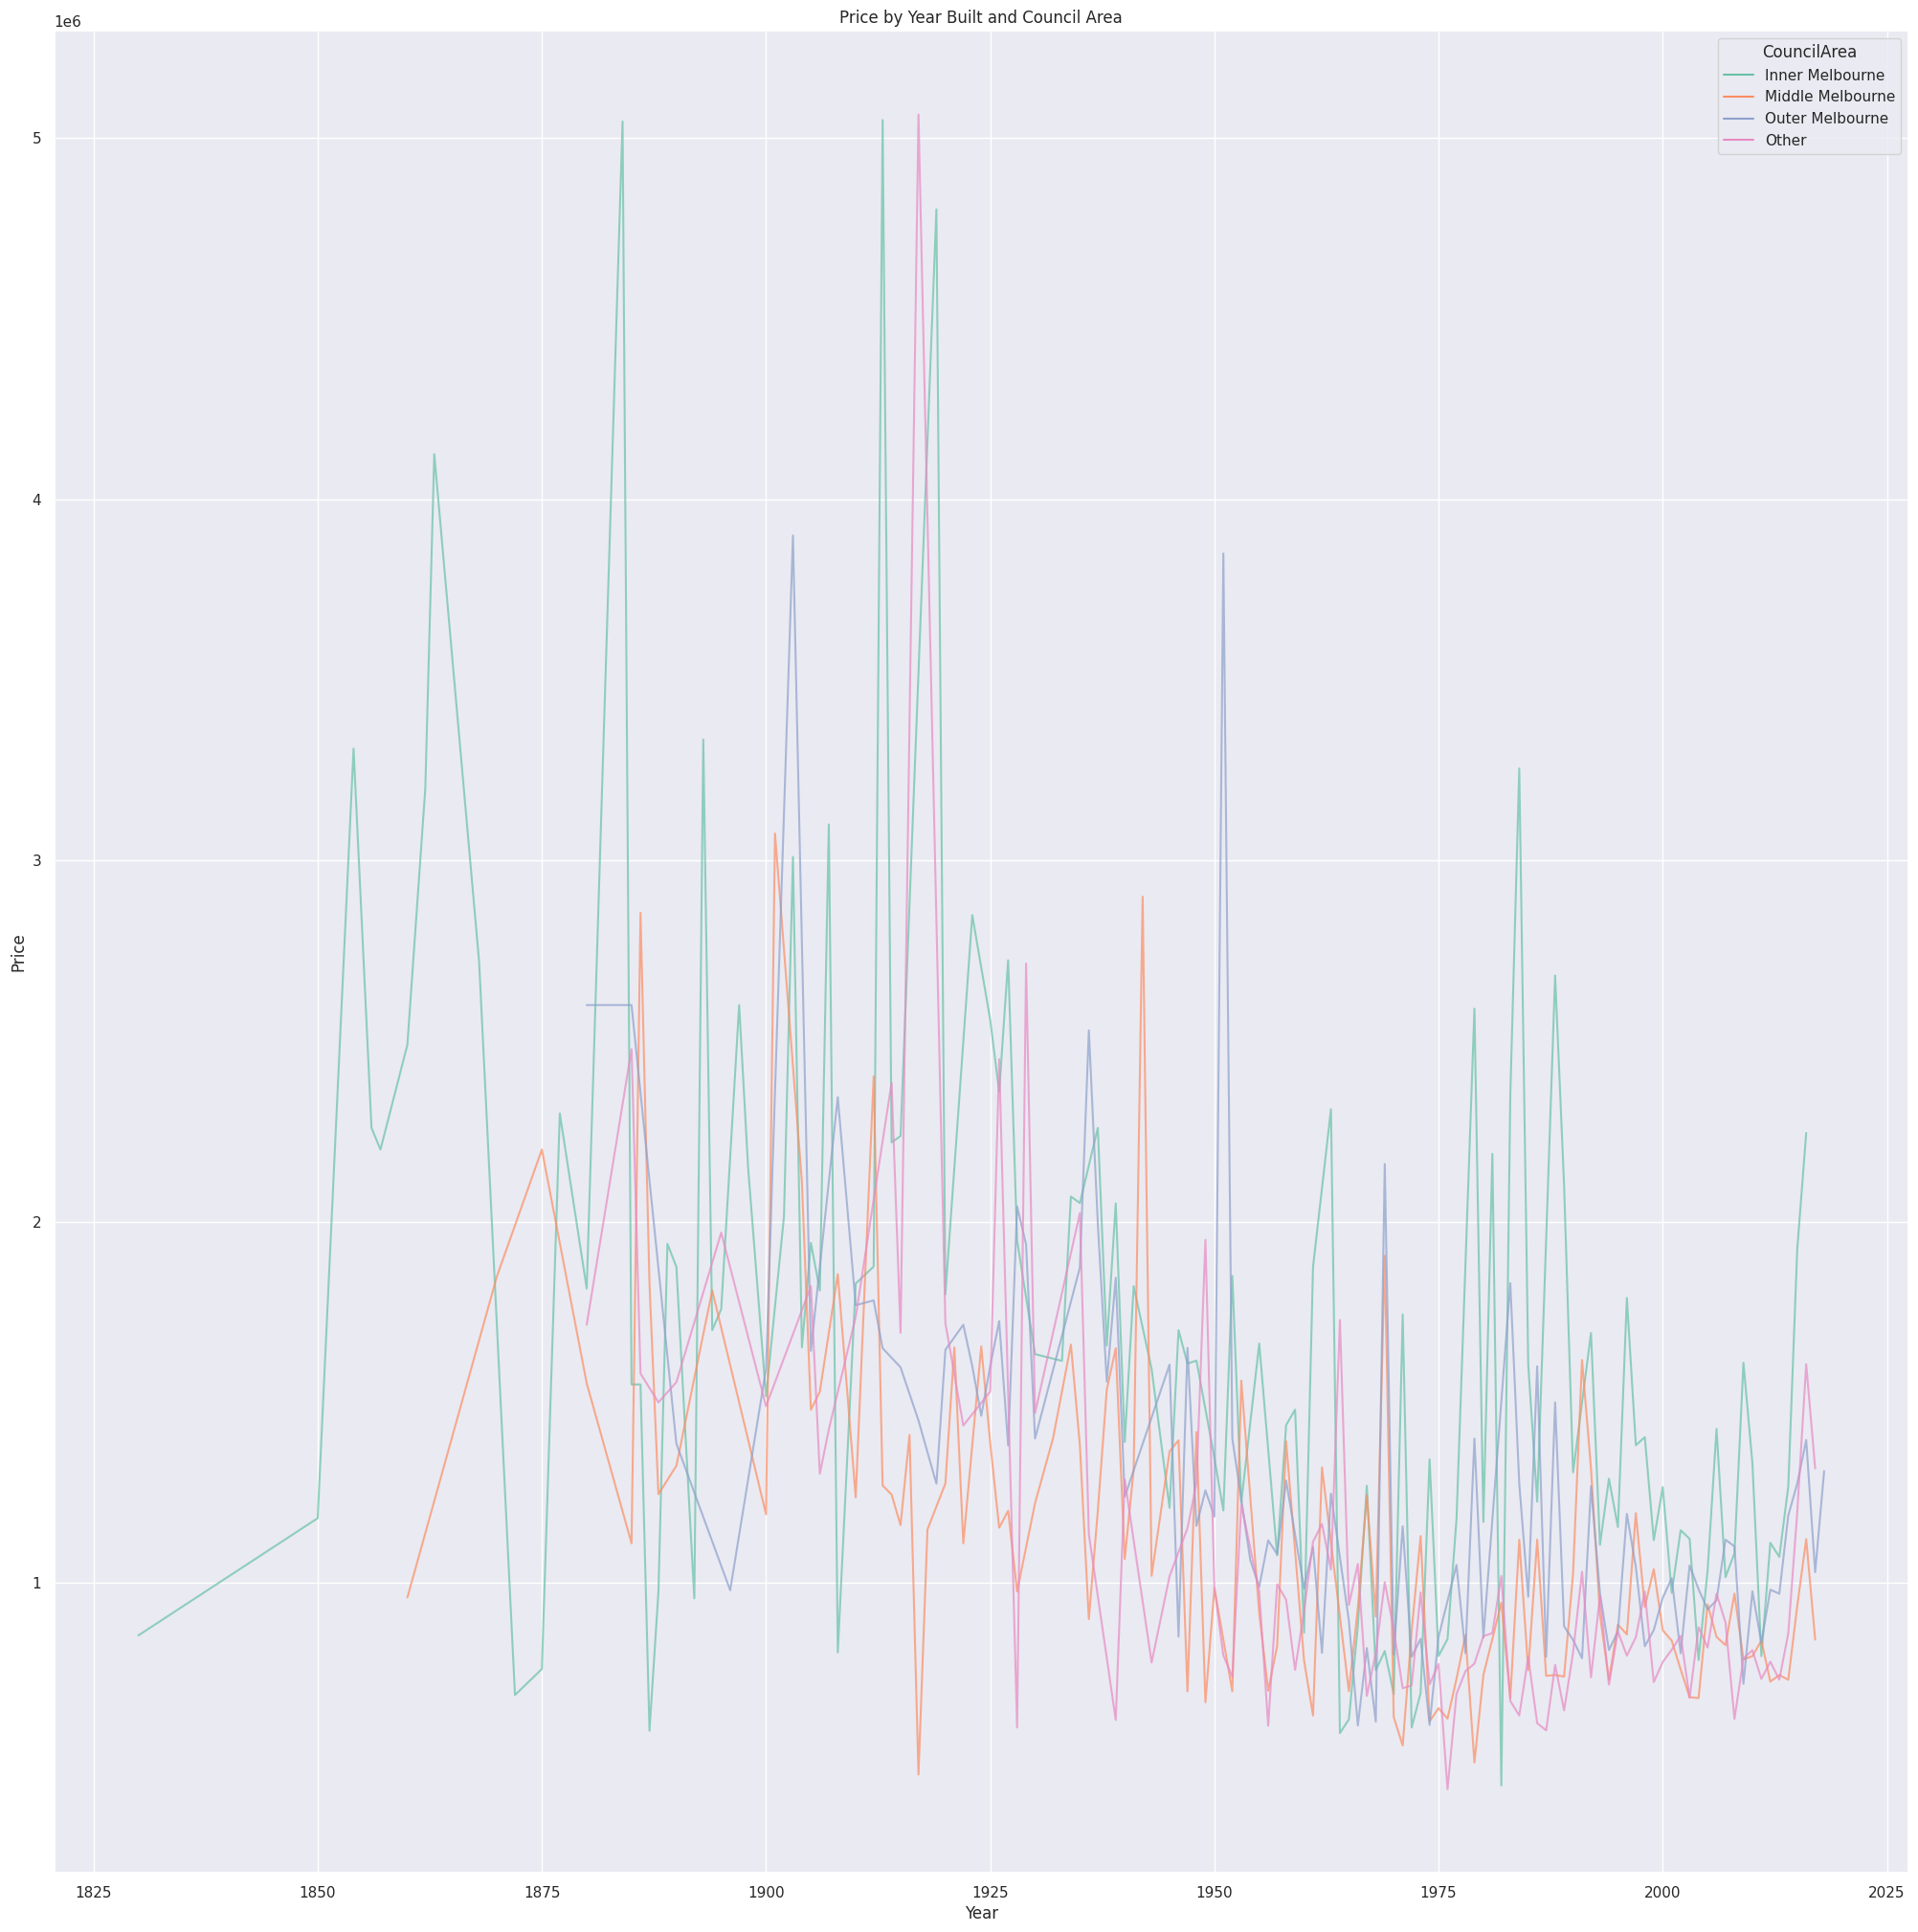

In [22]:
plt.figure(figsize=(25,25))
sns.set_style("darkgrid")
sns.set_palette("Set2")
sns.lineplot(x='YearBuilt', y='Price', hue='CouncilArea', data=df, ci=None, estimator='mean', alpha=0.7)
plt.title("Price by Year Built and Council Area")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

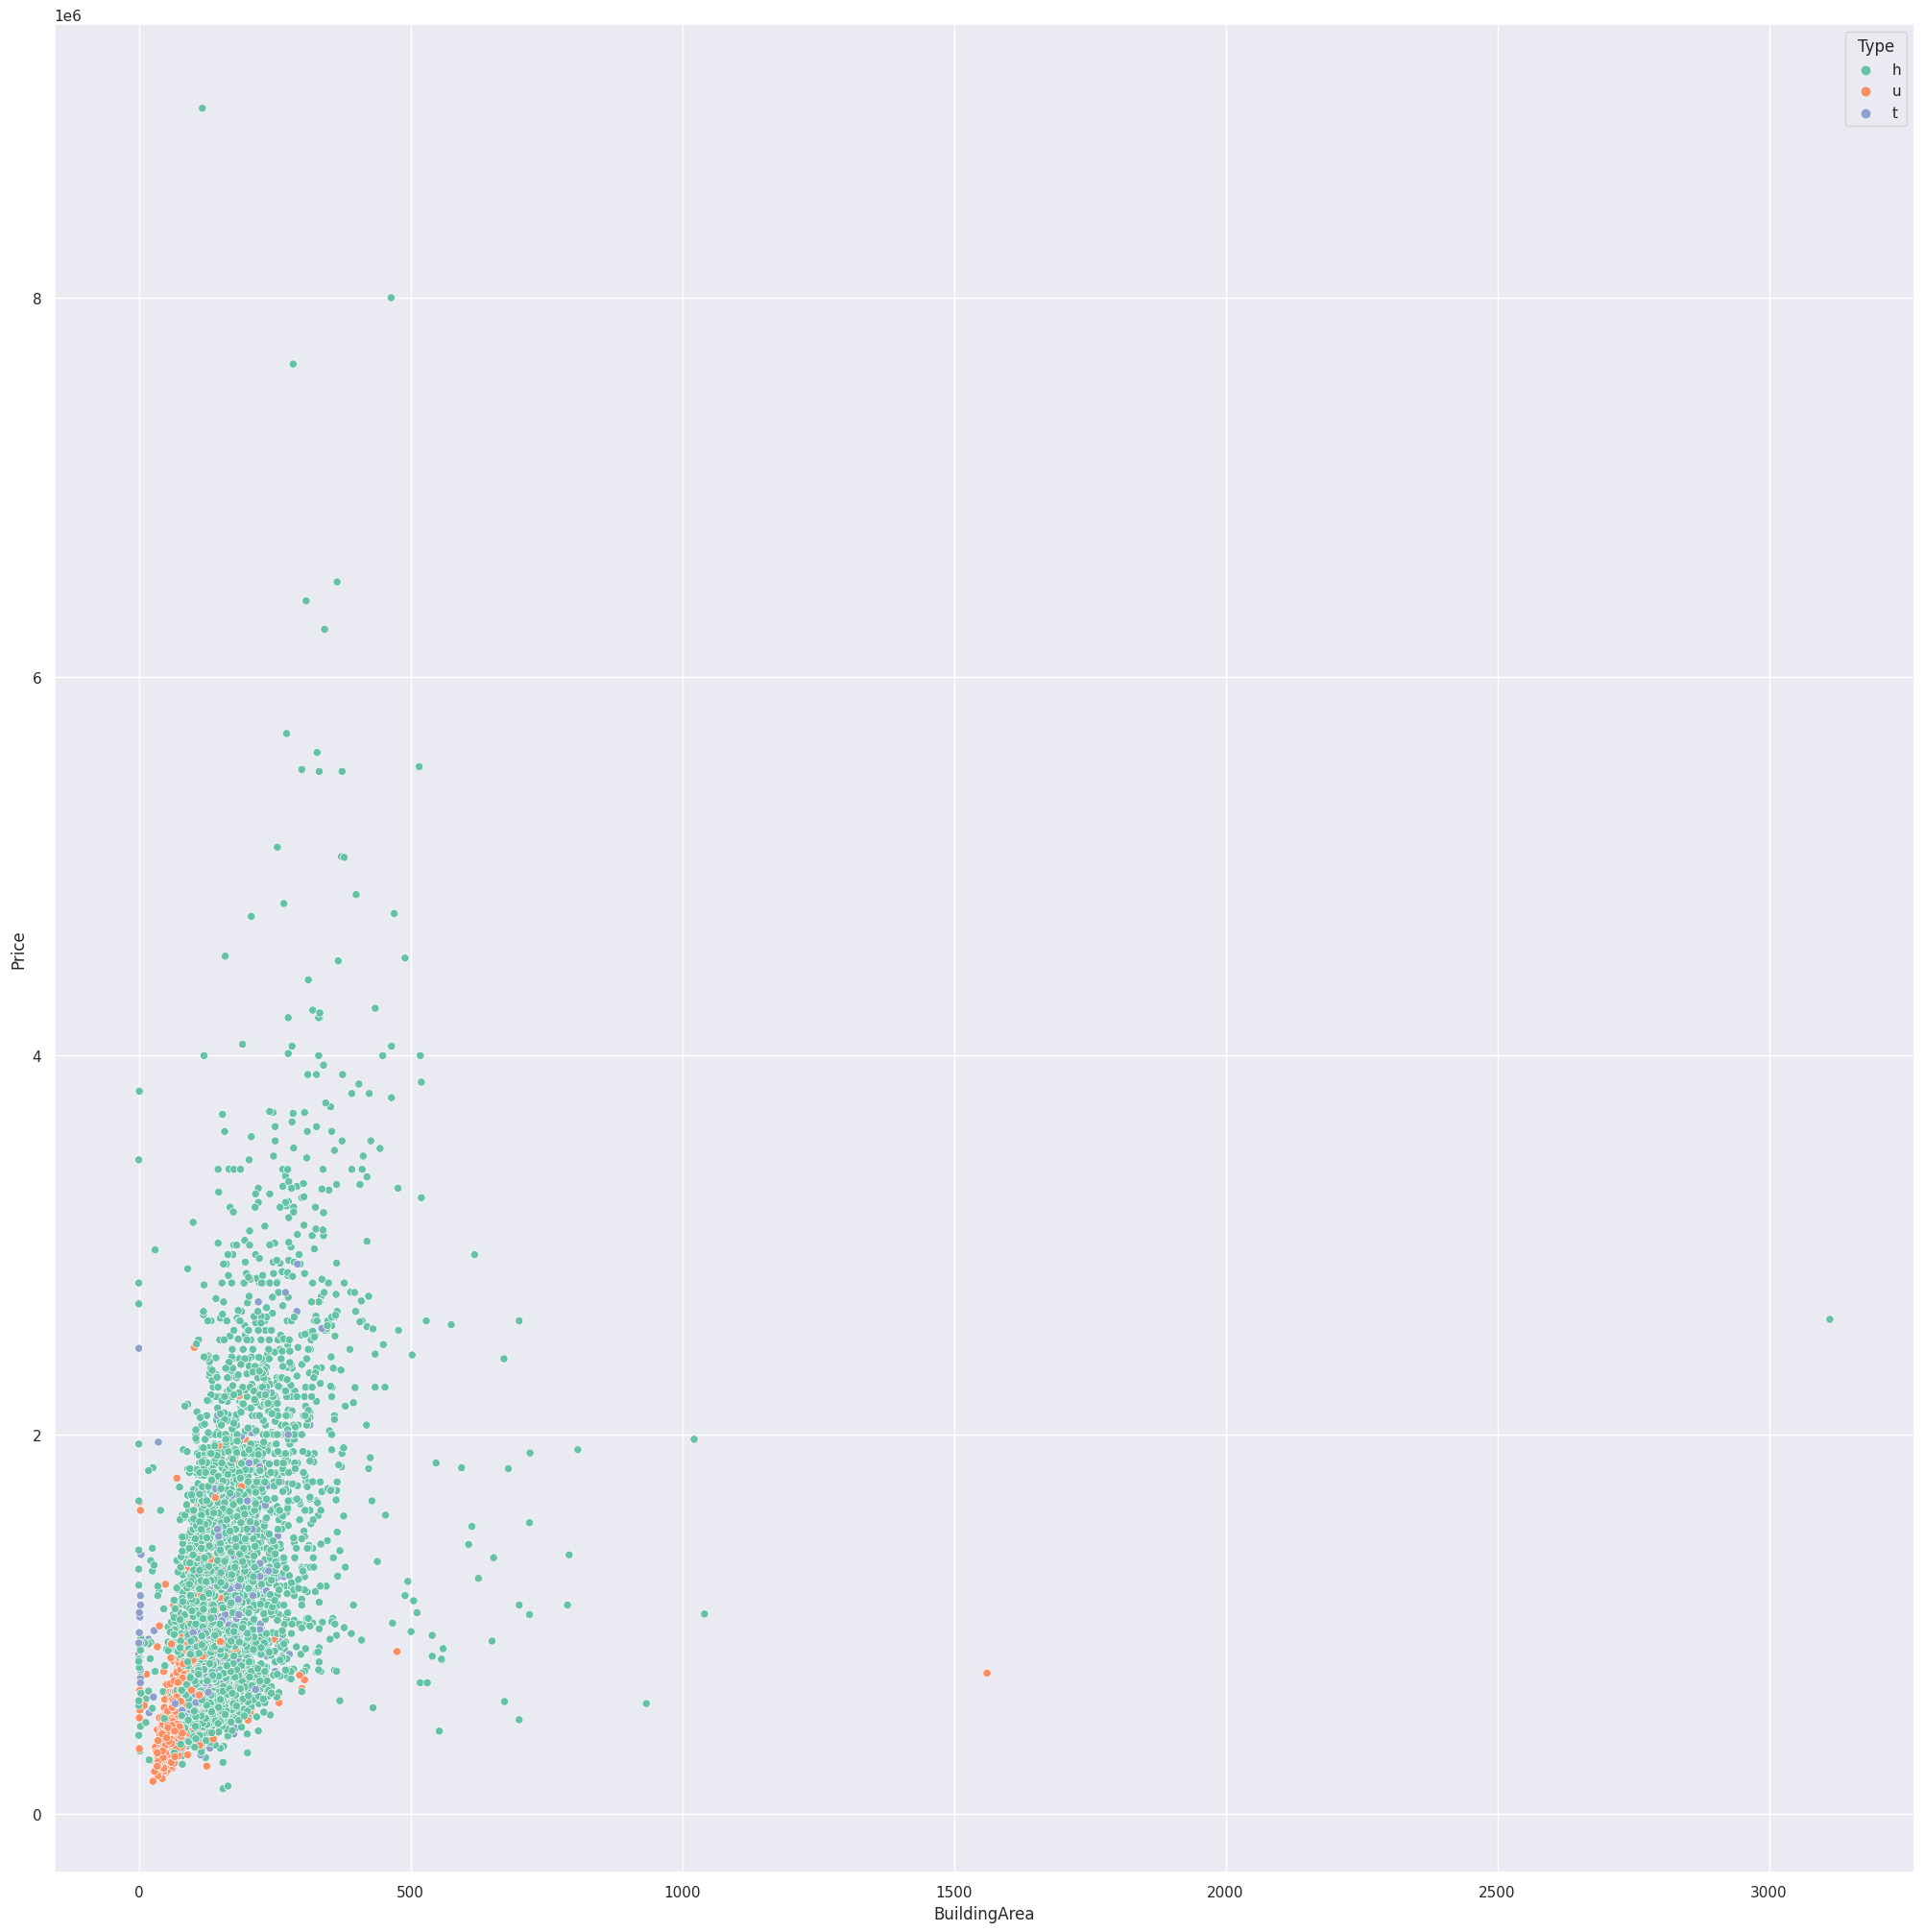

In [23]:
plt.figure(figsize=(25,25))
sns.scatterplot(x='BuildingArea', y='Price', hue='Type', data=df);

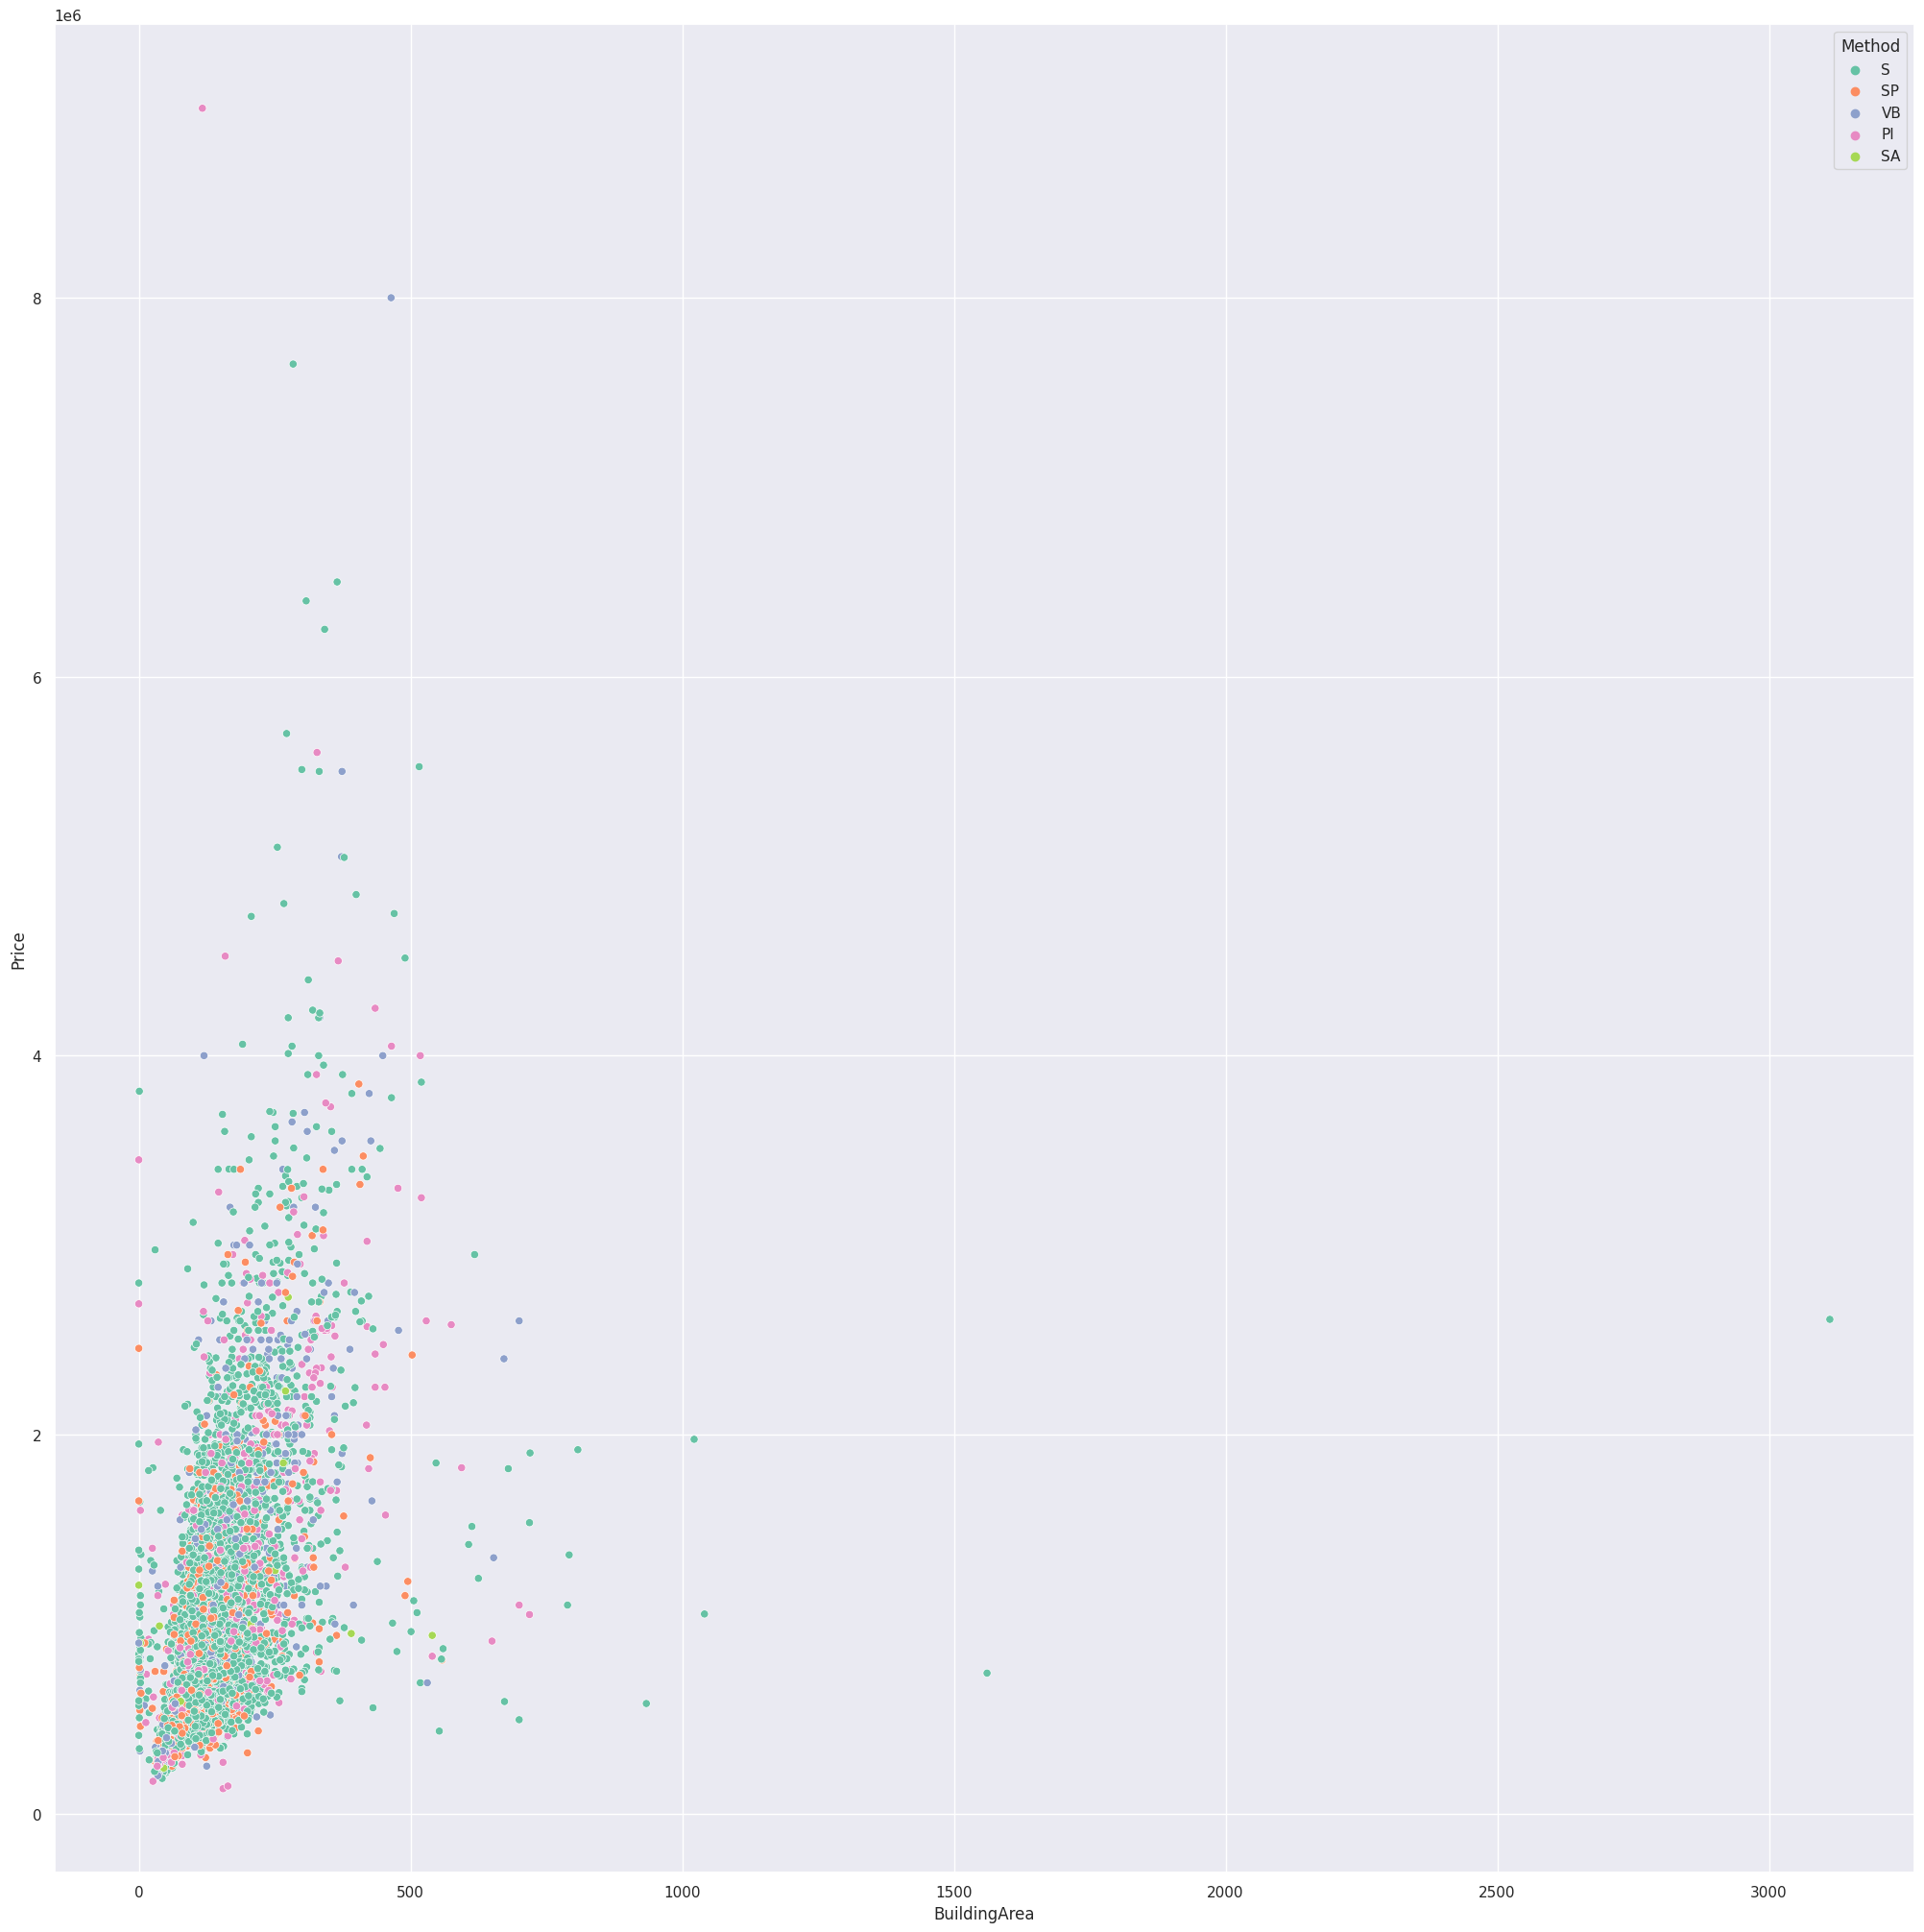

In [24]:
plt.figure(figsize=(25,25))
sns.scatterplot(x='BuildingArea', y='Price', hue='Method', data=df);

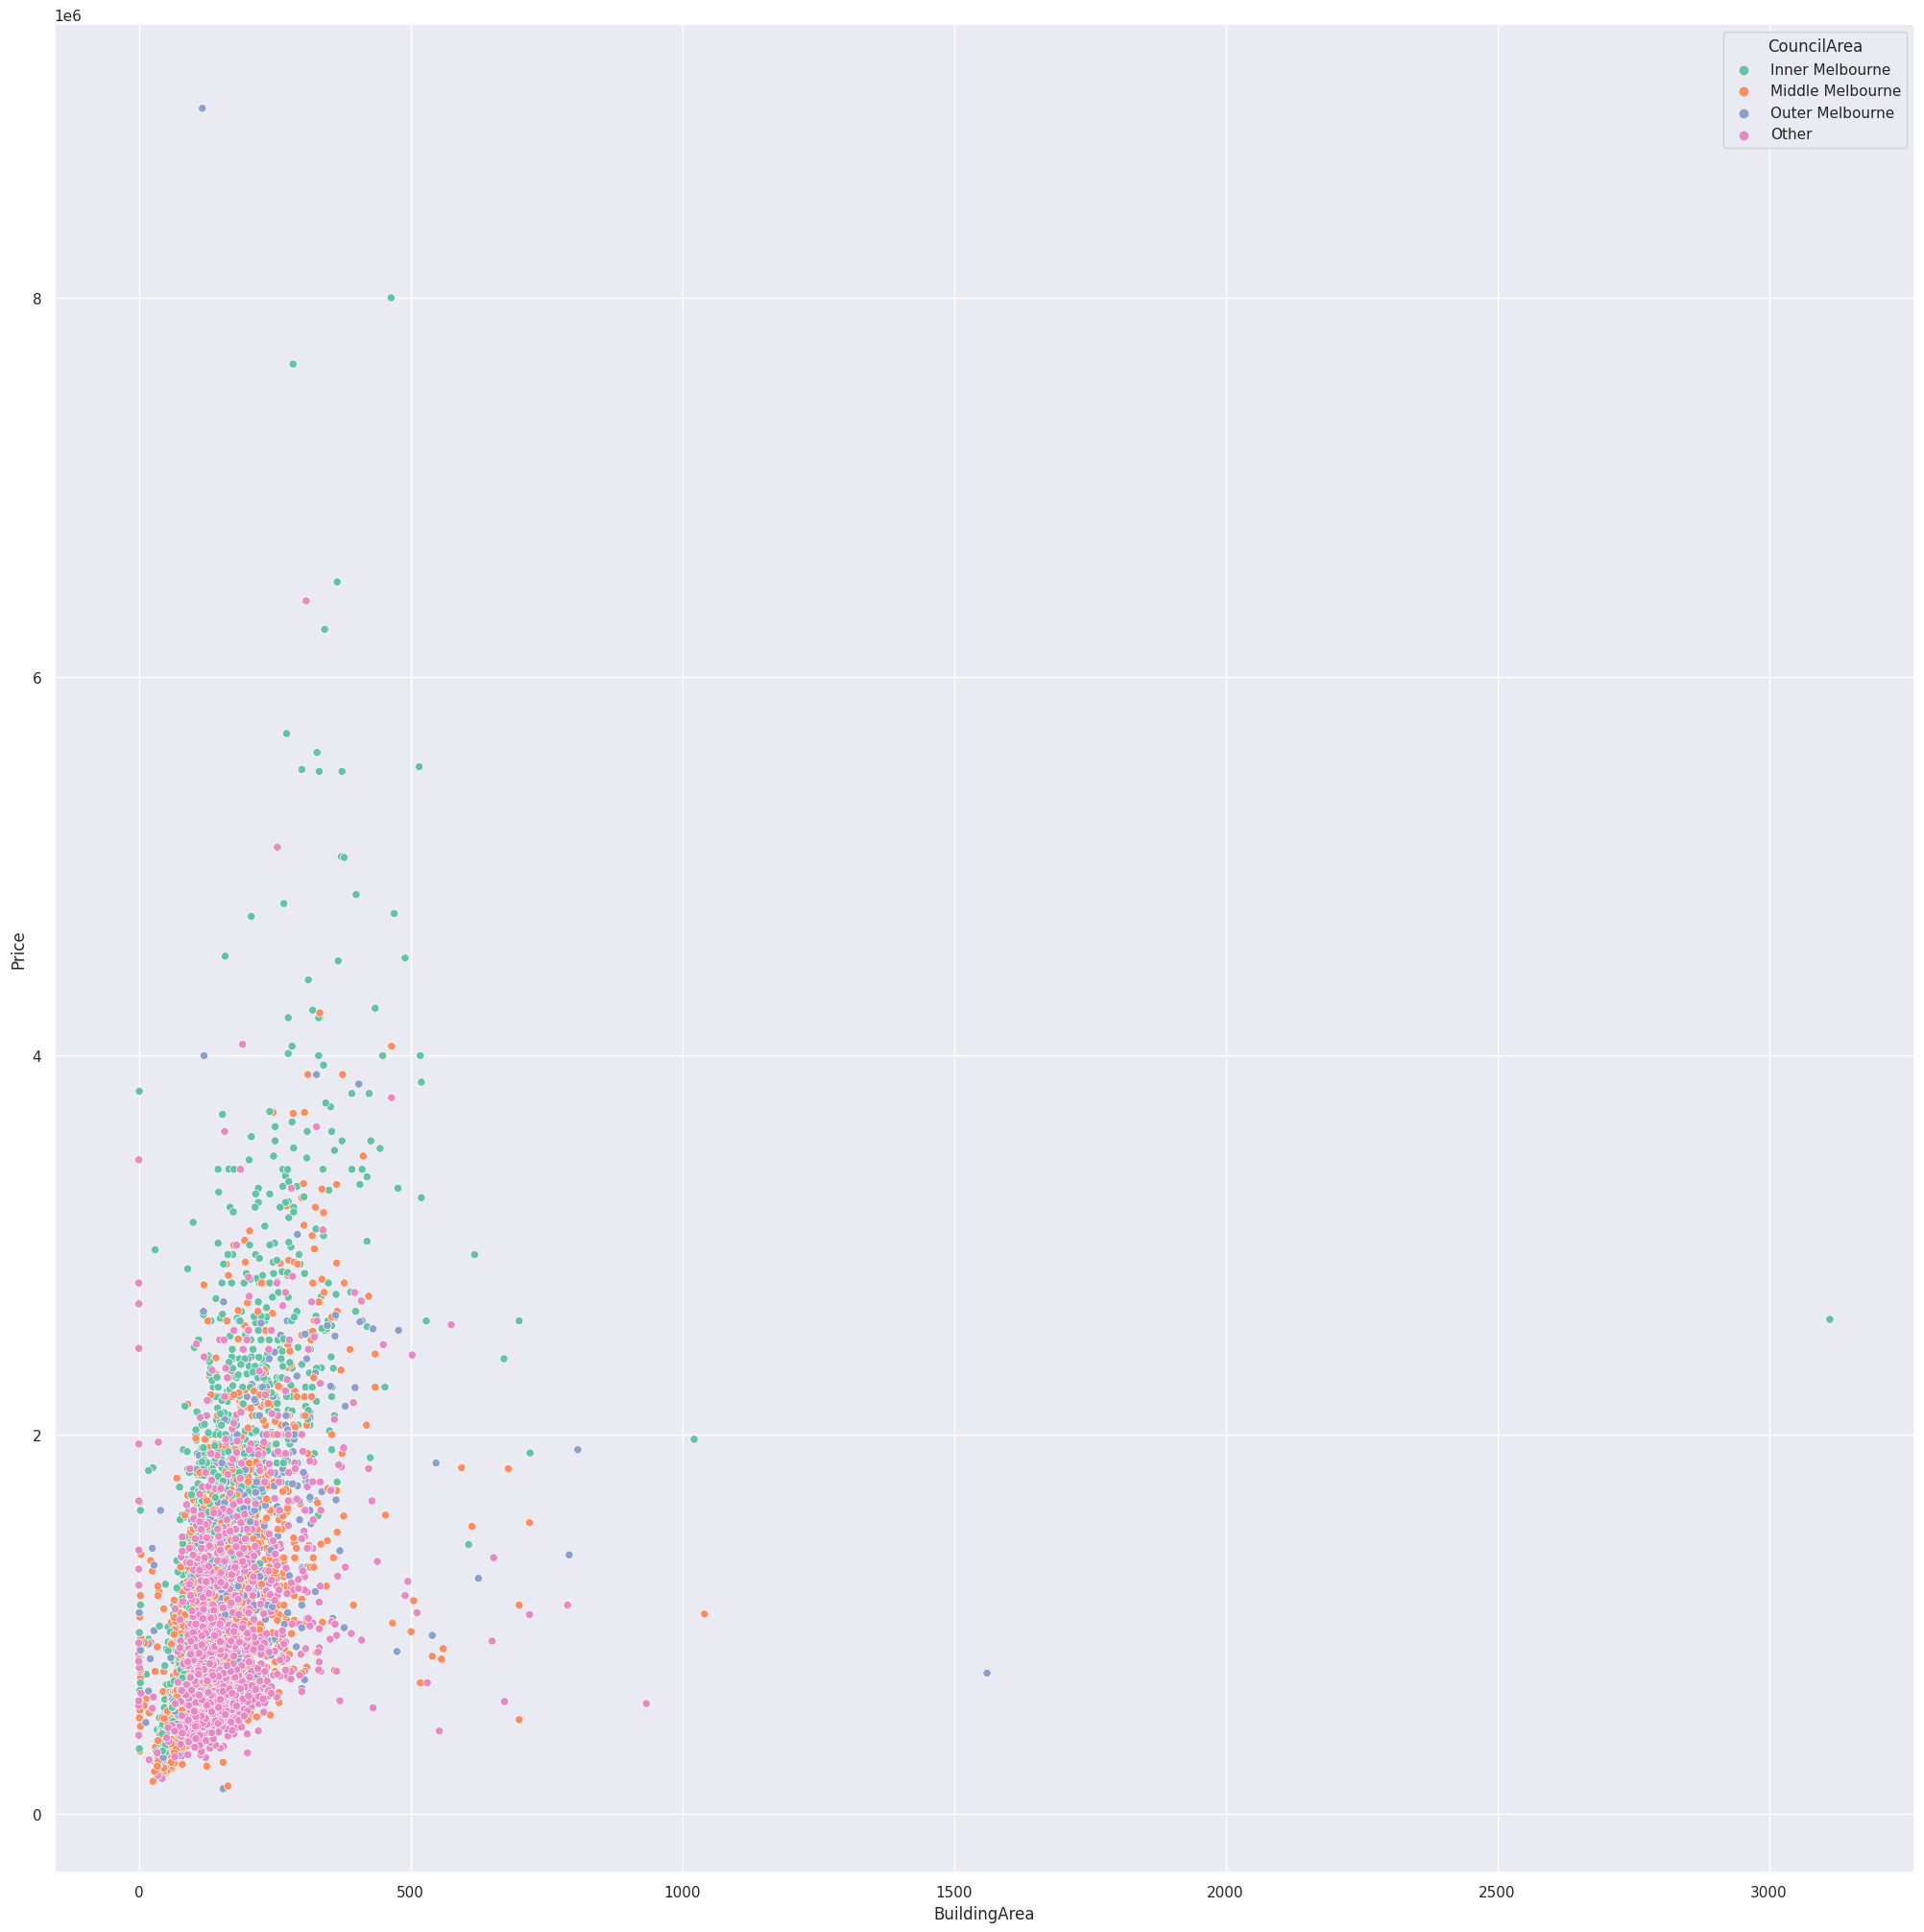

In [25]:
plt.figure(figsize=(25,25))
sns.scatterplot(x='BuildingArea', y='Price', hue='CouncilArea', data=df);

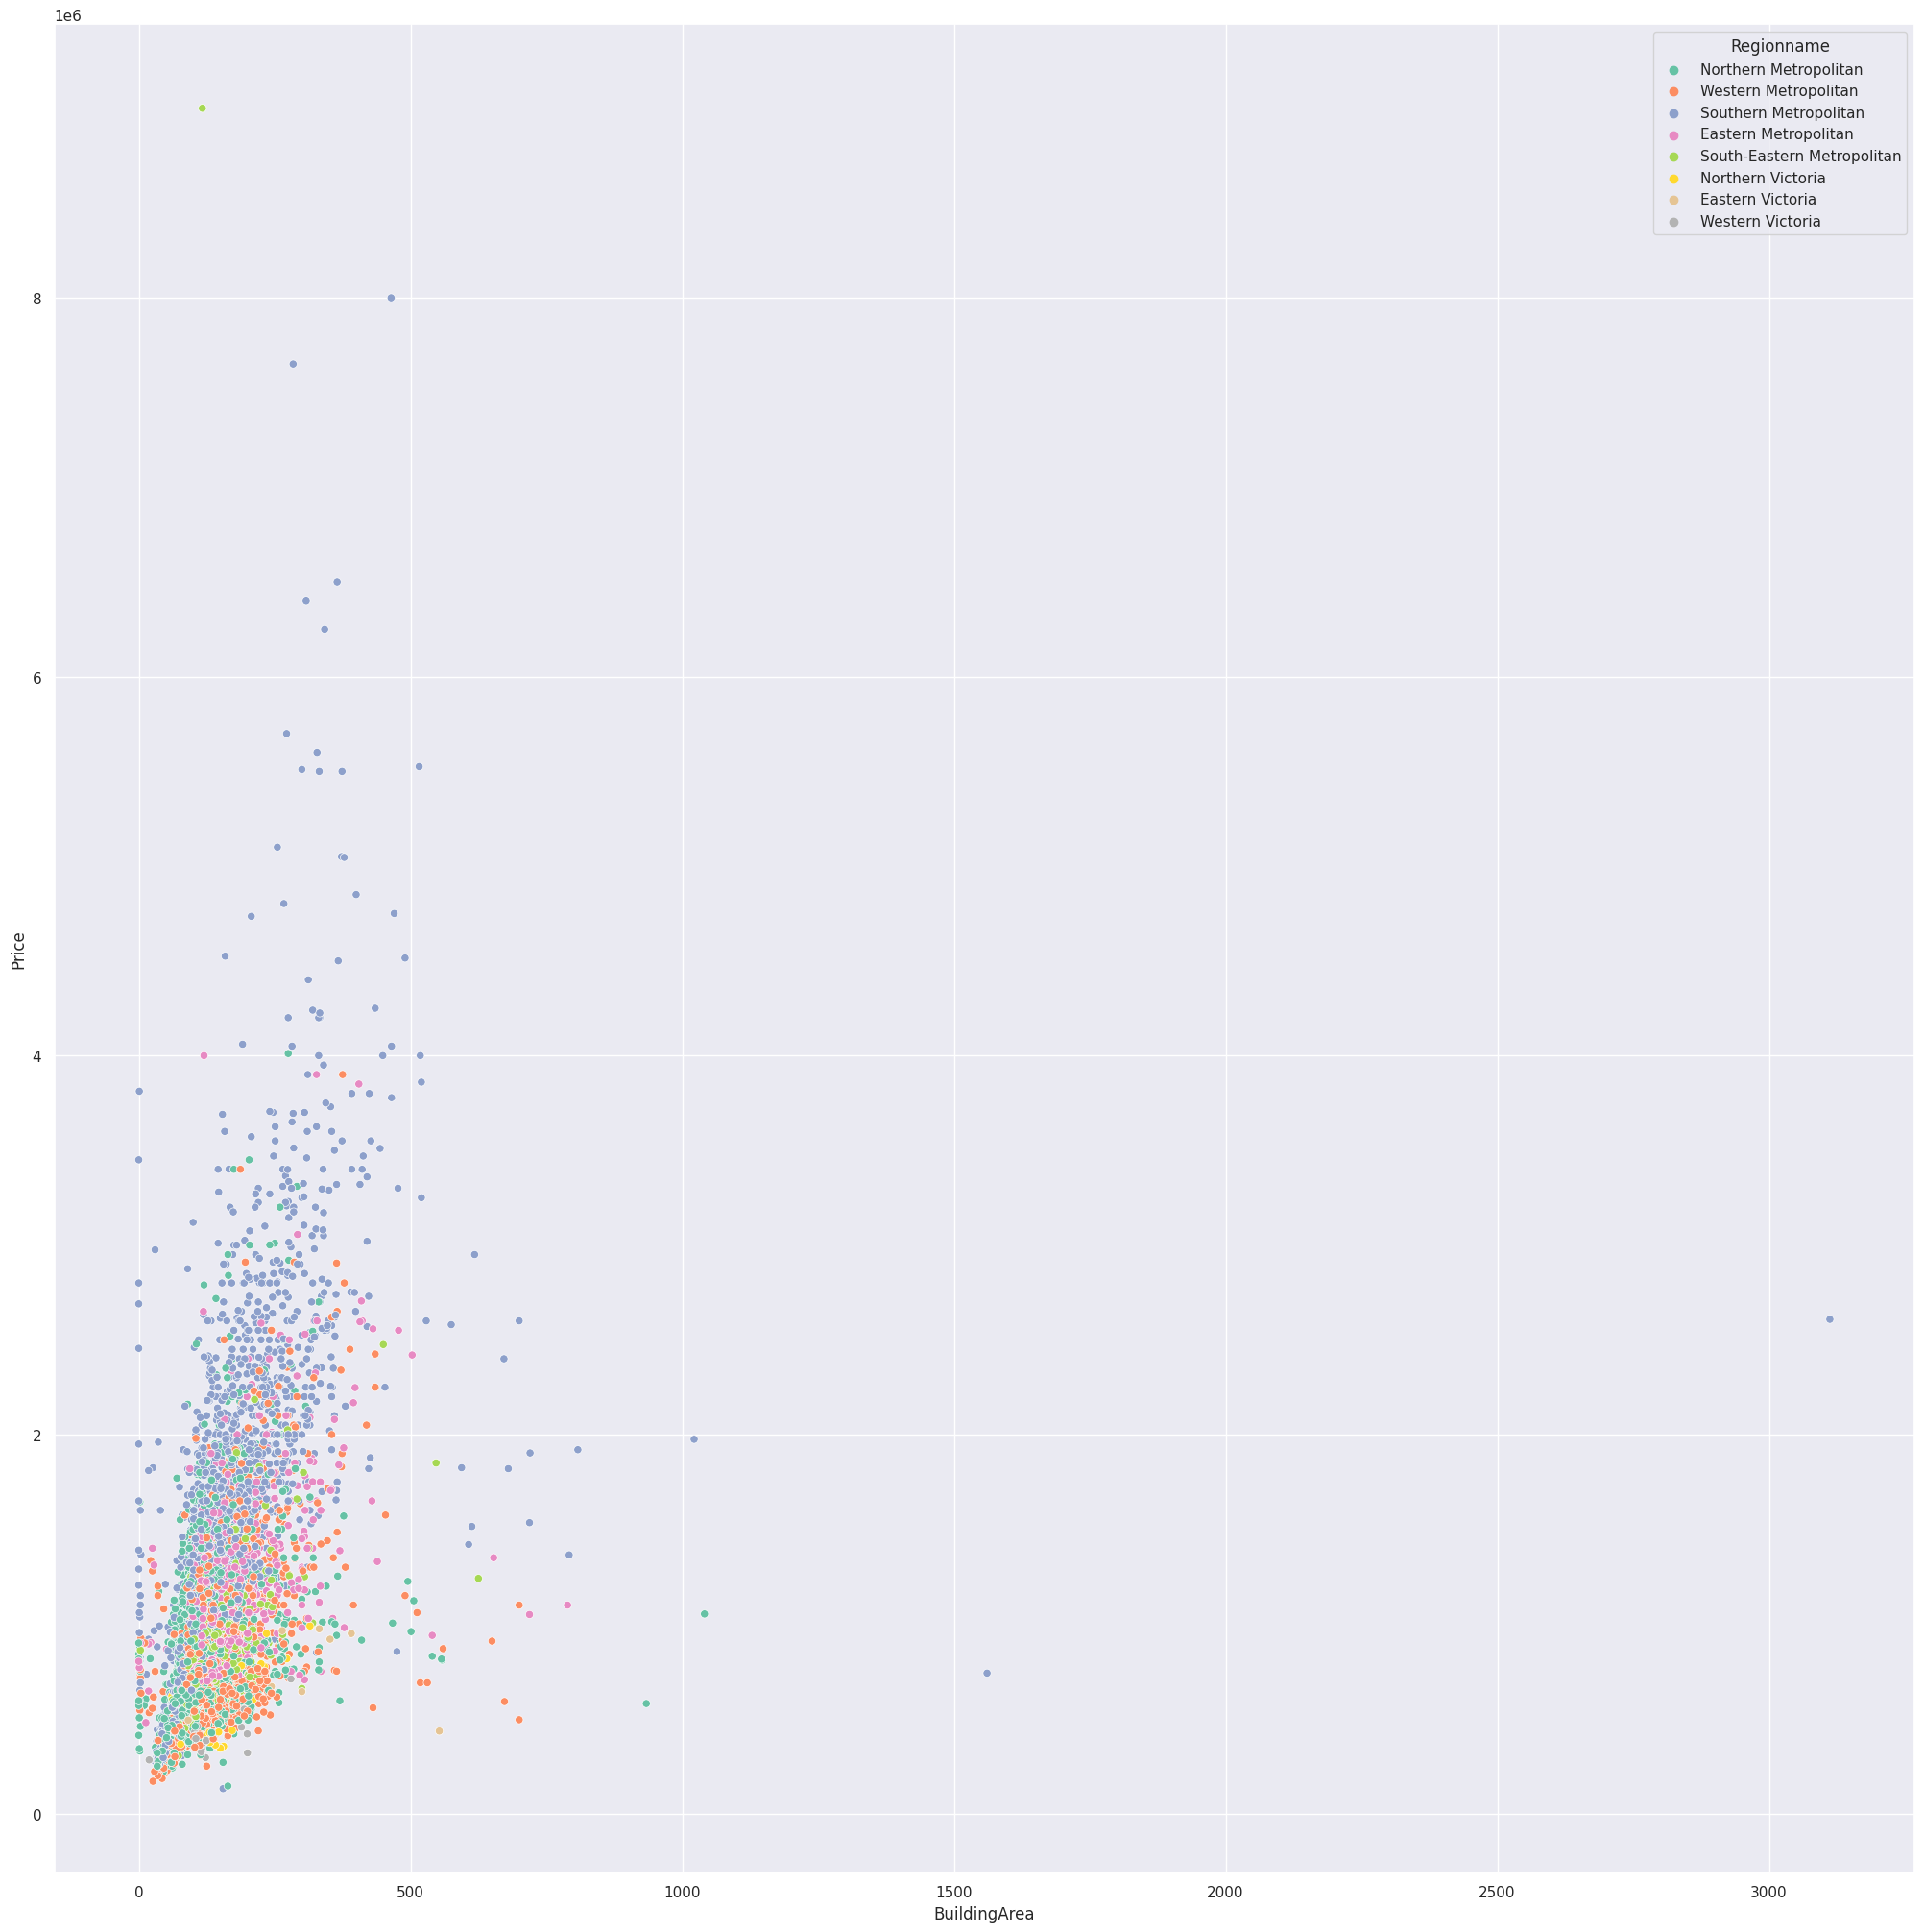

In [26]:
plt.figure(figsize=(25,25))
sns.scatterplot(x='BuildingArea', y='Price', hue='Regionname', data=df);

# Data Processing

In [27]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

BuildingArea    16.418820
Car              0.377864
dtype: float64

In [28]:
df.shape

(8204, 17)

In [29]:
df.dropna(subset=['Car'], inplace=True)

In [30]:
df.shape

(8173, 17)

In [31]:
df['BuildingArea'].fillna(df['BuildingArea'].median(), inplace=True)

In [32]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Label Encoding for each object dataype

In [33]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

Type: ['h' 'u' 't']
Method: ['S' 'SP' 'VB' 'PI' 'SA']
CouncilArea: ['Inner Melbourne' 'Middle Melbourne' 'Outer Melbourne' 'Other']
Regionname: ['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Northern Victoria'
 'Eastern Victoria' 'Western Victoria']


In [34]:
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f"{col}: {df[col].unique()}")

Type: [0 2 1]
Method: [1 3 4 0 2]
CouncilArea: [0 1 3 2]
Regionname: [2 6 5 0 4 3 1 7]


# Correlation Heatmap

<Axes: >

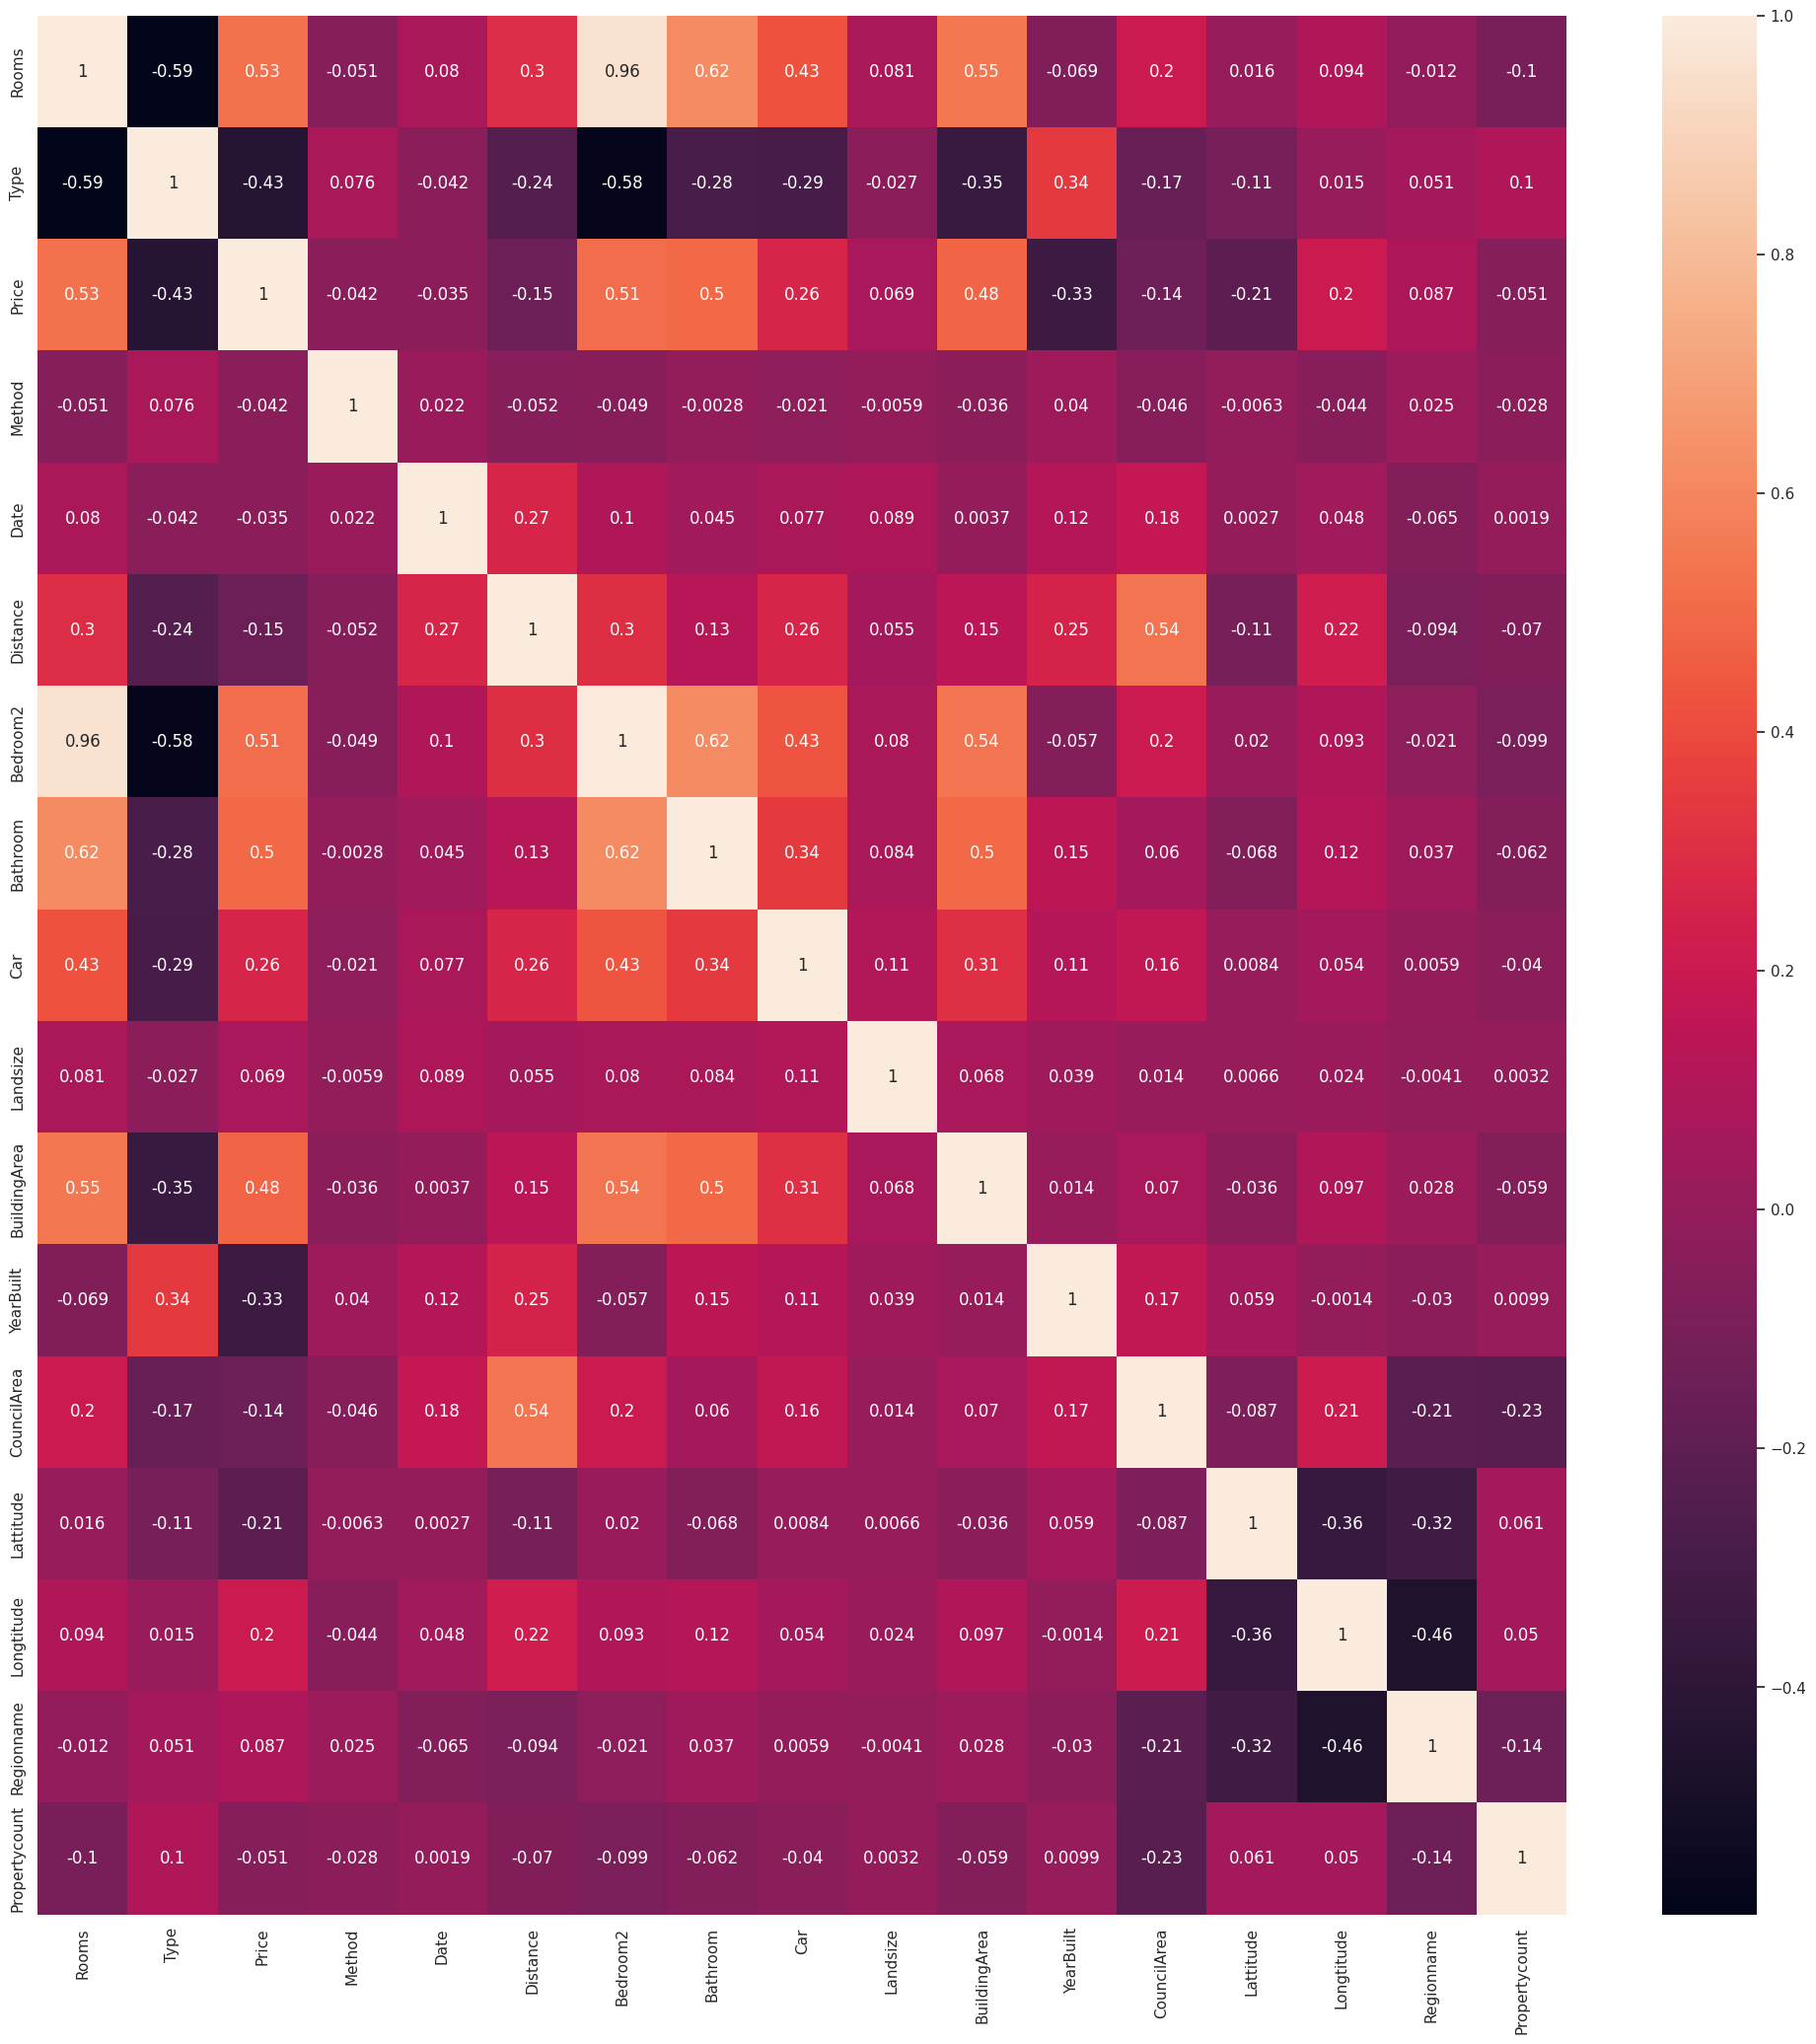

In [35]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Remove the Outlier from train data using Z-Score

In [37]:
from scipy import stats
selected_columns = ['Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
z_scores = np.abs(stats.zscore(X_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#from sklearn.datasets import load_boston

dtree = DecisionTreeRegressor()
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 42]
}
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [39]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='auto', min_samples_leaf=3, min_samples_split=2)
dtree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=3,
                      random_state=0)

In [40]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 234313.4426791598
MAPE is 0.22338672889575736
MSE is 164167106863.86633
R2 score is 0.6097678627102774
RMSE score is 405175.4025898738


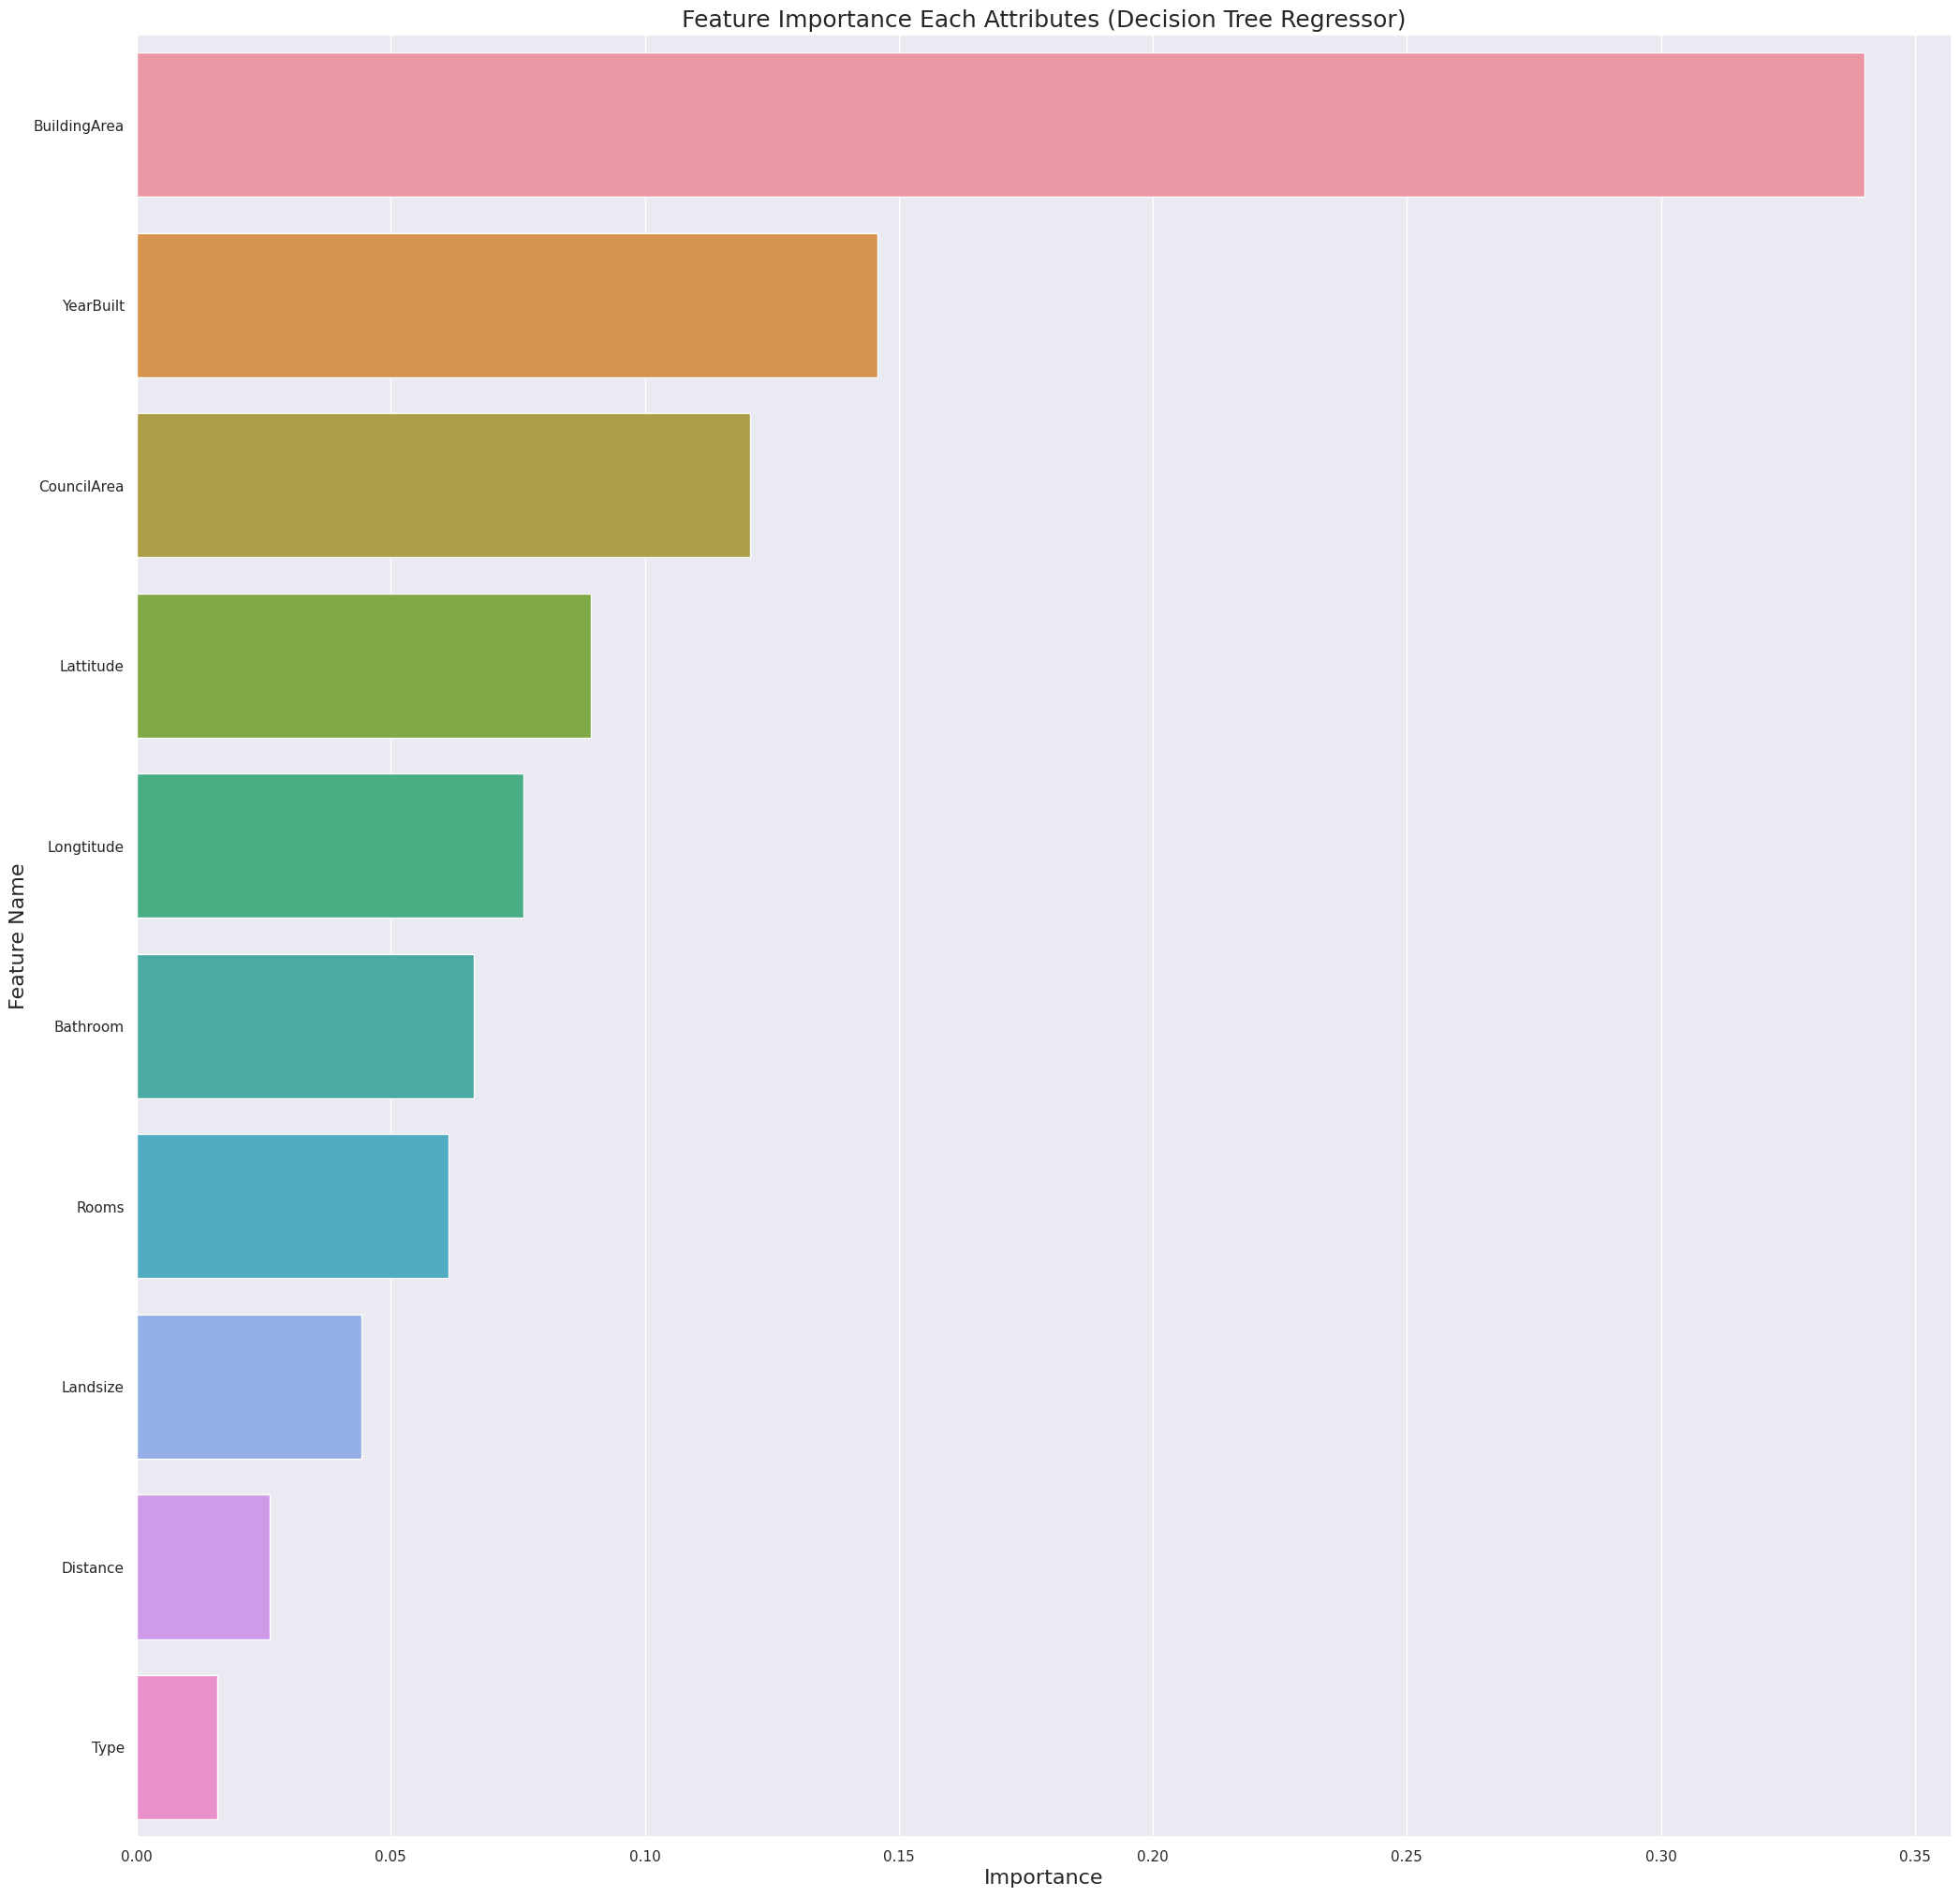

In [41]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(25,25))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [42]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.7 MB/s eta 0:00:00


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


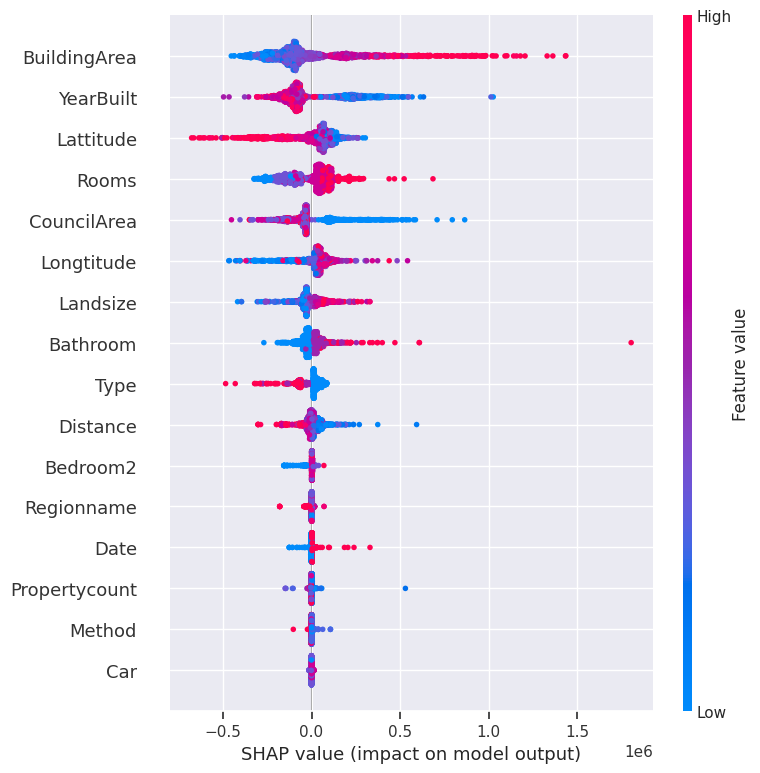

In [43]:
plt.figure(figsize=(25,25))
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

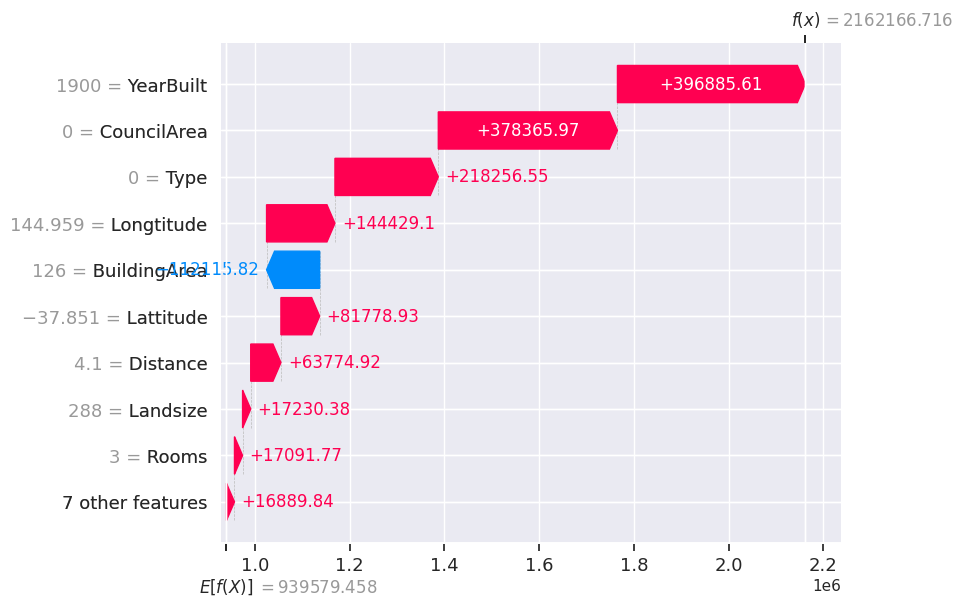

In [44]:
plt.figure(figsize=(25,25))
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

# XGBoost Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
xgb = XGBRegressor()
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'random_state': [0, 42]
}
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=4, learning_rate=0.1, n_estimators=1000, random_state=0)
xgb.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = xgb.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": xgb.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (XGBoost Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
explainer = shap.Explainer(xgb, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])